In [4]:
from sympy import *
from safe_region_utils import *
from symbolic_utils import *
init_printing()

%load_ext autoreload
%autoreload 2

## Setting up example

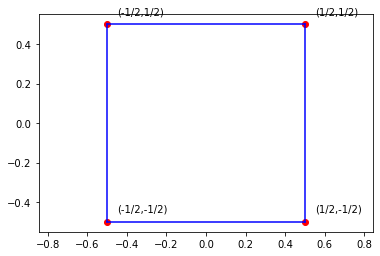

In [7]:
x, y = symbols("x y")
## Short Example ##
w = 0.5
square_points: list = [
    geometry.Point(val) for val in [[w, -w], [w, w], [-w, w], [-w, -w]]
]
square: geometry.Polygon = Polygon(*square_points)
plot_polygon(square)

w = Symbol("w", real=True, positive=True, nonzero=True)
square_points: list = [
    geometry.Point(val) for val in [[w, -w], [w, w], [-w, w], [-w, -w]]
]
square_param: geometry.Polygon = Polygon(*square_points)
compute_polygon_angles(square_param)
# traj_piecewise = Piecewise((sin(x / 2), x < 0), (x / 2, x >= 0))
# plot(traj_piecewise)
# plt.show()

In [116]:
a = Symbol("a", real=True, nonzero=True)
b = Symbol("b", real=True)
c = Symbol("c", real=True)

In [118]:
domain = Interval(-12, 9)
xbounds = [-15, 12]
ybounds = [-3, 6]
example_name = "symbolic parabola"

traj = a*x**2 + b*x +c

In [252]:
cond = compute_unsafe_cond_symbolic(
    x,
    y,
    square_param,
    traj,
    Reals,
    add_notches=True,
)
cond

solveset solution: EmptySet
solveset solution: {-b/(2*a)}
solution when finding transitions for angle pi: {-b/(2*a)}
solveset solution: EmptySet
solveset solution: {-b/(2*a)}
solution when finding transitions for angle 0: {-b/(2*a)}
pair used for transition point finding: {x: -b/(2*a)}
pair used for transition point finding: {x: -b/(2*a)}
func_var: x
transitions as set: {Point2D(oo, oo*a + oo*b + c), Point2D(-oo, oo*a - oo*b + c), Point2D(-b/(2*a), c - b**2/(4*a))}
transitions: [Point2D(-oo, oo*a - oo*b + c), Point2D(-b/(2*a), c - b**2/(4*a)), Point2D(oo, oo*a + oo*b + c)]
func_var_transitions: [-oo, -b/(2*a), oo]
var intervals: [(-oo, -b/(2*a)), (-b/(2*a), oo)]


                                                                                                        
⎛               ⎛         ⎛⎧                2                            ⎞⎞ ⎛        ⎛⎧               2 
⎜               ⎜         ⎜⎪               b                           b ⎟⎟ ⎜        ⎜⎪              b  
⎜          b    ⎜         ⎜⎪          c - ───             for w - x > ───⎟⎟ ⎜        ⎜⎪         c - ─── 
⎜x ≥ -w - ─── ∧ ⎜-w + y - ⎜⎨              4⋅a                         2⋅a⎟⎟⋅⎜w + y - ⎜⎨             4⋅a 
⎜         2⋅a   ⎜         ⎜⎪                                             ⎟⎟ ⎜        ⎜⎪                 
⎜               ⎜         ⎜⎪          2                                  ⎟⎟ ⎜        ⎜⎪         2       
⎝               ⎝         ⎝⎩a⋅(-w + x)  + b⋅(-w + x) + c  for w - x ≥ -∞ ⎠⎠ ⎝        ⎝⎩a⋅(w + x)  + b⋅(w
                                                                                                        

                                                      

In [253]:
plot_condition(x, y, cond, xbounds, ybounds, title=example_name)

Can't plot `cond` since it has too many variables. Please use .subs() to plot an instantation of this condition.
Extraneous variables to substitute out are {'w', 'b', 'c', 'a'}.


In [254]:
plot_condition(x, y, cond.subs(a, 1/4).subs(b, 1).subs(c, 2), xbounds, ybounds, title=example_name)

Can't plot `cond` since it has too many variables. Please use .subs() to plot an instantation of this condition.
Extraneous variables to substitute out are {'w'}.


In [255]:
plot_condition(x, y, cond.subs(a, 1/4).subs(b, 1).subs(c, 2), [-5,0], [0,2], title=example_name, resolution=0.05)

Can't plot `cond` since it has too many variables. Please use .subs() to plot an instantation of this condition.
Extraneous variables to substitute out are {'w'}.


In [ ]:
cond.subs(a, 1/4).subs(b, 1).subs(c, 2)

In [ ]:
print(
    "\nPlotting dot grid visualization of safe and unsafe regions.", 
    "This may take up to 20 seconds to plot.\nOnce displayed, close plot to continue example...\n"
)

plot_condition(x, y, cond.subs(a, 1/4), xbounds, ybounds, title=example_name)
mathematica_output = print_mathematica(
    x, y, cond, xbounds, ybounds, traj_piecewise, square
)
print("Mathematica command for plotting:\n", mathematica_output)

## Periodic

In [10]:
a

In [11]:
solve(Eq(diff(a*sin(x), x), 0), x)

In [12]:
b.assumptions0

{'real': True,
 'infinite': False,
 'finite': True,
 'complex': True,
 'imaginary': False,
 'commutative': True,
 'extended_real': True,
 'hermitian': True}

In [61]:
a = Symbol('a', real=True, nonzero=True)
b = Symbol('b', real=True, nonzero=True)
c = Symbol("c", real=True)

In [62]:
_n = Symbol("n")
soln = Union(ImageSet(Lambda(_n, (2*_n*pi + pi/2)/b), Integers), ImageSet(Lambda(_n, (2*_n*pi - pi/2)/b), Integers))
soln

⎧        π │      ⎫   ⎧        π │      ⎫
⎪2⋅π⋅n - ─ │      ⎪   ⎪2⋅π⋅n + ─ │      ⎪
⎨        2 │      ⎬   ⎨        2 │      ⎬
⎪───────── │ n ∊ ℤ⎪ ∪ ⎪───────── │ n ∊ ℤ⎪
⎩    b     │      ⎭   ⎩    b     │      ⎭

In [63]:
type(soln) is FiniteSet

False

In [64]:
type(soln)

sympy.sets.sets.Union

In [65]:
traj = sin(x)

angles, vertex_pairs = compute_polygon_angles(square)
# find_transitions(-y + traj, angles, x, y, domain)  # fails bc Intersection type poorly handled
find_transitions(-y + traj, angles, x, y, domain)

{-7*pi/2, -5*pi/2, -3*pi/2, -pi/2, pi/2, 3*pi/2, 5*pi/2}
{-7*pi/2, -5*pi/2, -3*pi/2, -pi/2, pi/2, 3*pi/2, 5*pi/2}


In [66]:
# a = Symbol('a', real=True, nonzero=True)
b = Symbol('b', real=True, nonzero=True)
a = Symbol('a', real=True)
# b = Symbol('b', real=True)
c = Symbol("c", real=True)

In [71]:
traj = a*sin(b*x)

angles, vertex_pairs = compute_polygon_angles(square)
# find_transitions(-y + traj, angles, x, y, domain)  # fails bc Intersection type poorly handled
find_transitions(-y + traj, angles, x, y, Reals)

Union(ImageSet(Lambda(_n, (2*_n*pi + pi/2)/b), Integers), ImageSet(Lambda(_n, (2*_n*pi - pi/2)/b), Integers))
Union(ImageSet(Lambda(_n, (2*_n*pi + pi/2)/b), Integers), ImageSet(Lambda(_n, (2*_n*pi - pi/2)/b), Integers))


AttributeError: 'Union' object has no attribute 'as_base_exp'

In [45]:
ConditionSet(x, Ne(b, 0), Union(ImageSet(Lambda(x, (2*pi*x - pi/2)/b), Complement(Integers, ConditionSet(_n, Eq(b, 0)))), ImageSet(Lambda(x, (2*pi*x + pi/2)/b), Complement(Integers, ConditionSet(_n, Eq(b, 0))))))

⎧        π │      ⎫   ⎧        π │      ⎫
⎪2⋅π⋅x - ─ │      ⎪   ⎪2⋅π⋅x + ─ │      ⎪
⎨        2 │      ⎬   ⎨        2 │      ⎬
⎪───────── │ x ∊ ℤ⎪ ∪ ⎪───────── │ x ∊ ℤ⎪
⎩    b     │      ⎭   ⎩    b     │      ⎭

In [37]:
Union(ImageSet(Lambda(_n, (2*_n*pi + pi/2)/b), Integers), ImageSet(Lambda(_n, (2*_n*pi - pi/2)/b), Integers))

⎧        π │      ⎫   ⎧        π │      ⎫
⎪2⋅π⋅n - ─ │      ⎪   ⎪2⋅π⋅n + ─ │      ⎪
⎨        2 │      ⎬   ⎨        2 │      ⎬
⎪───────── │ n ∊ ℤ⎪ ∪ ⎪───────── │ n ∊ ℤ⎪
⎩    b     │      ⎭   ⎩    b     │      ⎭

In [77]:
# TODO: split Unions
ImageSet(Lambda(_n, (2*_n*pi + pi/2)/b), Integers)

⎧        π │      ⎫
⎪2⋅π⋅n + ─ │      ⎪
⎨        2 │      ⎬
⎪───────── │ n ∊ ℤ⎪
⎩    b     │      ⎭

In [81]:
ImageSet(Lambda(_n, (2*_n*pi + pi/2)/b), Integers).args[0]

In [108]:
domain

In [109]:
find_transitions(-y + traj, angles, x, y, domain)  # fails bc Intersection type poorly handled

TypeError: cannot determine truth value of Relational

In [107]:
solveres = solveset(Eq(diff(a*sin(b*x), x), 0), x, domain)

TypeError: cannot determine truth value of Relational

In [85]:
solveres = solveset(Eq(diff(a*sin(b*x), x), 0), x, Reals)
solveres

⎧        π │      ⎫   ⎧        π │      ⎫
⎪2⋅n⋅π + ─ │      ⎪   ⎪2⋅n⋅π - ─ │      ⎪
⎨        2 │      ⎬   ⎨        2 │      ⎬
⎪───────── │ n ∊ ℤ⎪ ∪ ⎪───────── │ n ∊ ℤ⎪
⎩    b     │      ⎭   ⎩    b     │      ⎭

In [113]:
# potentially useful and clean way of real-ify-ing this at the end
solveres.subs(b, 2).intersect(domain)

In [87]:
solveres.args

⎛⎧        π │      ⎫  ⎧        π │      ⎫⎞
⎜⎪2⋅n⋅π + ─ │      ⎪  ⎪2⋅n⋅π - ─ │      ⎪⎟
⎜⎨        2 │      ⎬  ⎨        2 │      ⎬⎟
⎜⎪───────── │ n ∊ ℤ⎪, ⎪───────── │ n ∊ ℤ⎪⎟
⎝⎩    b     │      ⎭  ⎩    b     │      ⎭⎠

In [106]:
print(type(solveres.args[0].args[0]))
solveres.args[0].args

<class 'sympy.core.function.Lambda'>


In [104]:
# split union
# then extract the lambda 
solveres.args[0].args[0].args

In [105]:
# then split the lambda into lhs and rhs
solveres.args[0].args[0].args[1]

## Piecewise

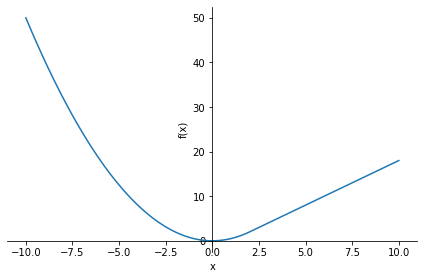

⎧           2                    
⎪        c⋅x            for b > x
⎨                                
⎪ 2                              
⎩b ⋅c + 2⋅b⋅c⋅(-b + x)  otherwise

In [119]:
c = Symbol("c", real=True, nonzero=True) # curvature
b = Symbol('b', real=True, positive=True) # boundary
# b = Symbol('b', real=True) # boundary

traj_piecewise = Piecewise(
                    (c*x**2, x < b),
                    (2*b*c*(x-b) + b**2*c, x >= b),
                )
plot(traj_piecewise.subs(c, 0.5).subs(b, 2))
traj_piecewise

In [229]:
piecewise_intervals = [Interval(-oo, b), Interval(b, oo)]
piecewise_intervals

In [162]:
list(zip(traj_piecewise.args, piecewise_intervals))

⎡⎛⎛   2       ⎞         ⎞  ⎛⎛ 2                         ⎞        ⎞⎤
⎣⎝⎝c⋅x , b > x⎠, (-∞, b]⎠, ⎝⎝b ⋅c + 2⋅b⋅c⋅(-b + x), True⎠, [b, ∞)⎠⎦

In [290]:
(-oo).is_imaginary

False

In [294]:
(oo*c).is_imaginary

False

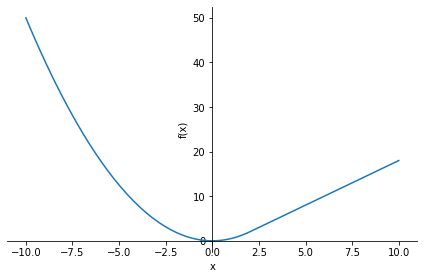

In [412]:
plot(traj_piecewise.subs(c, 0.5).subs(b, 2))

In [421]:
domain = Interval(-12, 9)
xbounds = [-10, 10]
ybounds = [-4, 10]
example_name = "symbolic ACAS X"


cond = compute_unsafe_cond_symbolic(
    x,
    y,
    square,
    traj_piecewise,
    Reals,
    add_notches=True,
    intervals = piecewise_intervals # NOTE: new 
)
cond

                                                                                                        
⎛              ⎛    ⎛⎧            2                               ⎞    ⎞ ⎛    ⎛⎧            2           
⎜              ⎜    ⎜⎪           b ⋅c              for b > x - 1/2⎟   1⎟ ⎜    ⎜⎪           b ⋅c         
⎜x ≥ b - 1/2 ∧ ⎜y - ⎜⎨                                            ⎟ - ─⎟⋅⎜y - ⎜⎨                        
⎜              ⎜    ⎜⎪ 2                                          ⎟   2⎟ ⎜    ⎜⎪ 2                      
⎝              ⎝    ⎝⎩b ⋅c + 2⋅b⋅c⋅(-b + x - 1/2)     for x ≤ ∞   ⎠    ⎠ ⎝    ⎝⎩b ⋅c + 2⋅b⋅c⋅(-b + x + 1
                                                                                                        

                                                                                                        
                    ⎞    ⎞    ⎞   ⎛              ⎛    ⎛⎧            2                               ⎞   
     for b > x + 1/2⎟   1⎟    ⎟   ⎜              ⎜    

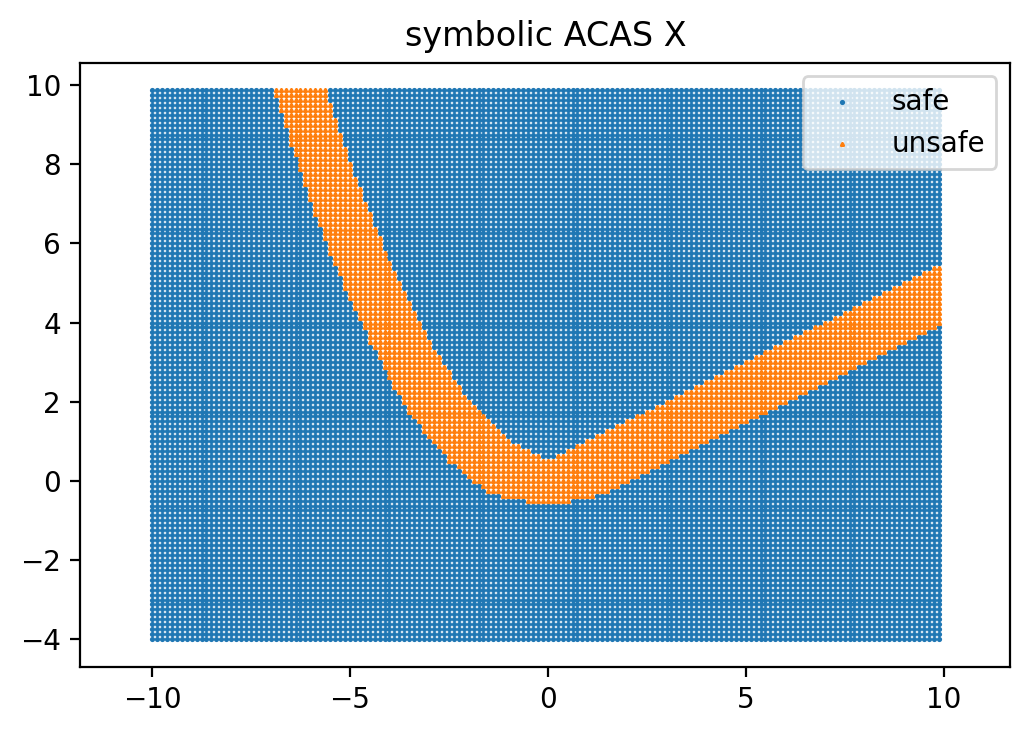

In [424]:
plot_condition(x, y, cond.subs(c, 0.25).subs(b, 1), xbounds, ybounds, title=example_name, resolution = 0.125)

# ACAS X Symbolic

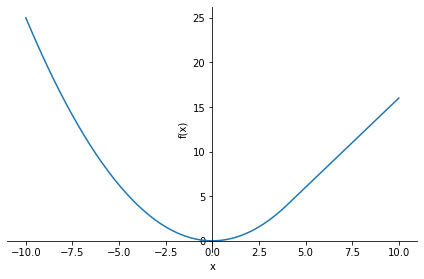

⎧           2                    
⎪        c⋅x            for b > x
⎨                                
⎪ 2                              
⎩b ⋅c + 2⋅b⋅c⋅(-b + x)  otherwise

In [12]:
c = Symbol("c", real=True, nonzero=True) # curvature
b = Symbol('b', real=True, positive=True) # boundary
# b = Symbol('b', real=True) # boundary


# TODO: change trajectory to not have notch at x=0
traj_piecewise = Piecewise(
                    (c*x**2, x < b),
                    (2*b*c*(x-b) + b**2*c, x >= b),
                )
plot(traj_piecewise.subs(c, 0.25).subs(b, 4))
traj_piecewise

In [13]:
domain = Interval(-12, 9)
xbounds = [-10, 10]
ybounds = [-4, 10]
example_name = "symbolic ACAS X"

In [14]:
piecewise_intervals = [Interval(-oo, b), Interval(b, oo)]
piecewise_intervals

In [15]:
w = Symbol("w", real=True, positive=True, nonzero=True)
square_points: list = [
    geometry.Point(val) for val in [[w, -w], [w, w], [-w, w], [-w, -w]]
]
square_param: geometry.Polygon = Polygon(*square_points)
square_num: geometry.Polygon = Polygon(*square_points).subs(w, 1)
    
poly = square_param

In [16]:
clauses_acas, explicit_acas = compute_unsafe_conds_symbolic(
    x, y,
    poly,
    traj_piecewise,
    domain=Reals,
    intervals = piecewise_intervals,
    print_runtime=True,
    print_orderings=True,
)

[Boundary(-oo, oo*c),
Transition(0, 0),
Boundary(b, b**2*c),
Boundary(oo, b**2*c + oo*c)]

Took 0.0006310939788818359 seconds to compute 1 possible orderings.
Took 0.20017099380493164 seconds to compute 1 clauses


In [17]:
params = [(c, 0.25), (b, 4), (w, 1)]
t0 = time.time()
numeric_acas = explicit_acas.instantiate(params)
print(f"Took {time.time() - t0} seconds to instantiate")
print(numeric_acas.ordering)
numeric_acas.clause

Took 0.08241915702819824 seconds to instantiate
[Boundary(-oo, oo*c), Transition(0, 0), Boundary(b, b**2*c), Boundary(oo, b**2*c + oo*c)]


                                                                                                        
                                                                                                        
⎛                ⎛    ⎛⎧    4.0      for x < 3⎞    ⎞ ⎛    ⎛⎧    4.0      for x < 5⎞    ⎞    ⎞   ⎛       
⎜x ≥ 3 ∧ x ≥ y ∧ ⎜y - ⎜⎨                      ⎟ + 1⎟⋅⎜y - ⎜⎨                      ⎟ - 1⎟ ≤ 0⎟ ∨ ⎜x ≥ 3 ∧
⎝                ⎝    ⎝⎩2.0⋅x - 2.0  for x ≤ ∞⎠    ⎠ ⎝    ⎝⎩2.0⋅x - 6.0  for x ≤ ∞⎠    ⎠    ⎠   ⎝       
                                                                                                        
                                                                                                        

                                                                                                        
                                                                                              ⎛         
               ⎛    ⎛⎧    4.0      for x < 3⎞    ⎞ ⎛  

In [18]:
w = Symbol("w", real=True, positive=True, nonzero=True)
square_points: list = [
    geometry.Point(val) for val in [[w, -w], [w, w], [-w, w], [-w, -w]]
]
square_param: geometry.Polygon = Polygon(*square_points)
square_num: geometry.Polygon = Polygon(*square_points).subs(w, 1)
    
poly = square_param
    
transitions, lookup, func_var = compute_all_transitions(
    x, y,
    poly,
    traj_piecewise,
    domain = Reals, 
    intervals = piecewise_intervals,
)

t0 = time.time()
transition_orderings = sort_or_order(transitions, lookup, func_var)
print(f"Took {time.time()-t0} seconds to compute", 
      f"{len(transition_orderings)} possible orderings.")
transition_orderings

Took 0.00015497207641601562 seconds to compute 1 possible orderings.


[[Boundary(-oo, oo*c),
  Transition(0, 0),
  Boundary(b, b**2*c),
  Boundary(oo, b**2*c + oo*c)]]

In [19]:
t0 = time.time()
clauses = [generate_clause(x,y, poly, traj_piecewise, sorted_transitions, lookup, add_notches=False)
           for sorted_transitions in transition_orderings]
print(f"Took {time.time()-t0} seconds to compute {len(clauses)} clauses")

Took 0.09436202049255371 seconds to compute 1 clauses


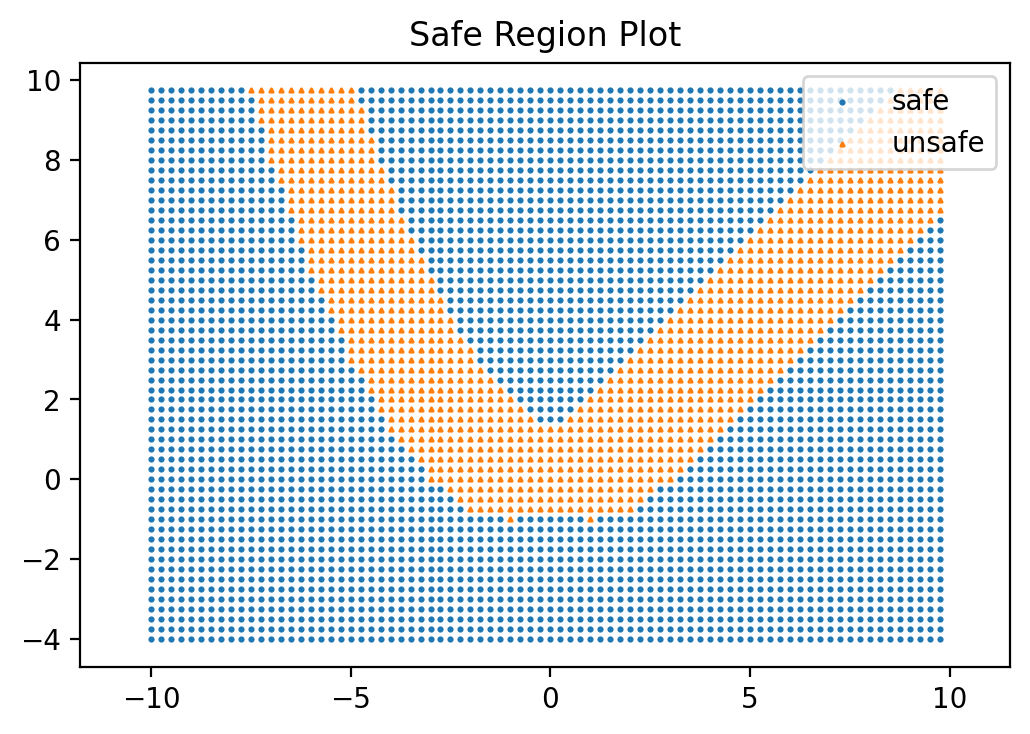

In [20]:
resolution = 0.25
plot_condition(x, y, clauses[0].subs(c, 0.25).subs(b, 2).subs(w, 1), xbounds, ybounds, resolution=resolution)

# Adler 2019 UAV

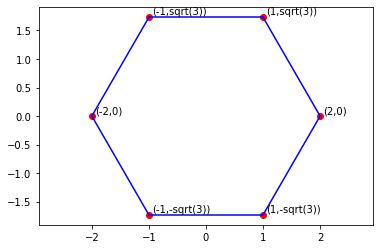

In [27]:
rp = 2
# TODO: symbolic radius for hexagon
hexagon = RegularPolygon(Point(0, 0), rp, 6)

plot_polygon(hexagon)

In [28]:
hexagon

In [26]:
simplify(Piecewise((sqrt(R**2 - x**2), x > bound),
          (-1/tan(theta)*(x-R*cos(theta)) + R*sin(theta), x <= bound)))

⎧    _________                      
⎪   ╱  2    2                       
⎪ ╲╱  R  - x      for x > R⋅│cos(θ)│
⎨                                   
⎪  R        x                       
⎪────── - ──────      otherwise     
⎩sin(θ)   tan(θ)                    

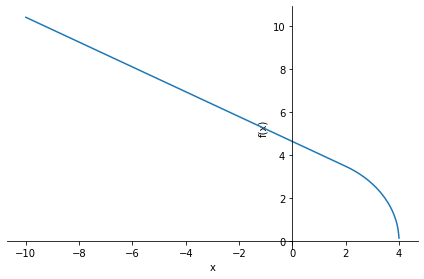

⎧         _________                                
⎪        ╱  2    2                        R        
⎪      ╲╱  R  - x          for x > ────────────────
⎪                                     _____________
⎪                                    ╱    2        
⎨                                  ╲╱  tan (θ) + 1 
⎪                                                  
⎪           -R⋅cos(θ) + x                          
⎪R⋅sin(θ) - ─────────────         otherwise        
⎪               tan(θ)                             
⎩                                                  

In [22]:
R = Symbol("R", real=True, positive=True, nonzero=True) 
theta = Symbol('theta', real=True, positive=True, nonzero=True)
bound = R / sqrt(tan(theta)**2 + 1)

traj_piecewise = Piecewise(
                    (sqrt(R**2 - x**2), x > bound),
                    (-1/tan(theta)*(x-R*cos(theta)) + R*sin(theta), x <= bound))
plot(traj_piecewise.subs(R, 4).subs(theta, pi/3))
traj_piecewise

In [23]:
clauses = compute_unsafe_conds_symbolic(
    x, y,
    square_num,
    traj_piecewise,
    domain=Reals,
    intervals = [Interval(bound, R), Interval(-oo, bound)],
    print_runtime=True,
    print_orderings=True,
)

[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Boundary(R, 0)]
[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Transition(0, R),
Boundary(R, 0)]

Took 0.0031337738037109375 seconds to compute 2 possible orderings.
Took 10.52177119255066 seconds to compute 2 clauses


In [181]:
clauses[0].subs(R, 4).subs(theta, pi/3)

                                                                                                        
⎛        ⎛    ⎛⎧  √3⋅(x - 3)                  ⎞    ⎞ ⎛    ⎛⎧  √3⋅(x - 1)                  ⎞    ⎞    ⎞   
⎜        ⎜    ⎜⎪- ────────── + 2⋅√3  for x ≤ 3⎟    ⎟ ⎜    ⎜⎪- ────────── + 2⋅√3  for x ≤ 1⎟    ⎟    ⎟   
⎜x ≤ 3 ∧ ⎜y - ⎜⎨      3                       ⎟ - 1⎟⋅⎜y - ⎜⎨      3                       ⎟ + 1⎟ ≤ 0⎟ ∨ 
⎜        ⎜    ⎜⎪                              ⎟    ⎟ ⎜    ⎜⎪                              ⎟    ⎟    ⎟   
⎝        ⎝    ⎝⎩       2⋅√3          otherwise⎠    ⎠ ⎝    ⎝⎩       2⋅√3          otherwise⎠    ⎠    ⎠   
                                                                                                        

                                                                                                        
⎛        ⎛    ⎛⎧  √3⋅(x - 3)                  ⎞    ⎞ ⎛    ⎛⎧  √3⋅(x - 1)                  ⎞    ⎞    ⎞   
⎜        ⎜    ⎜⎪- ────────── + 2⋅√3  for x ≤ 3⎟    ⎟ ⎜

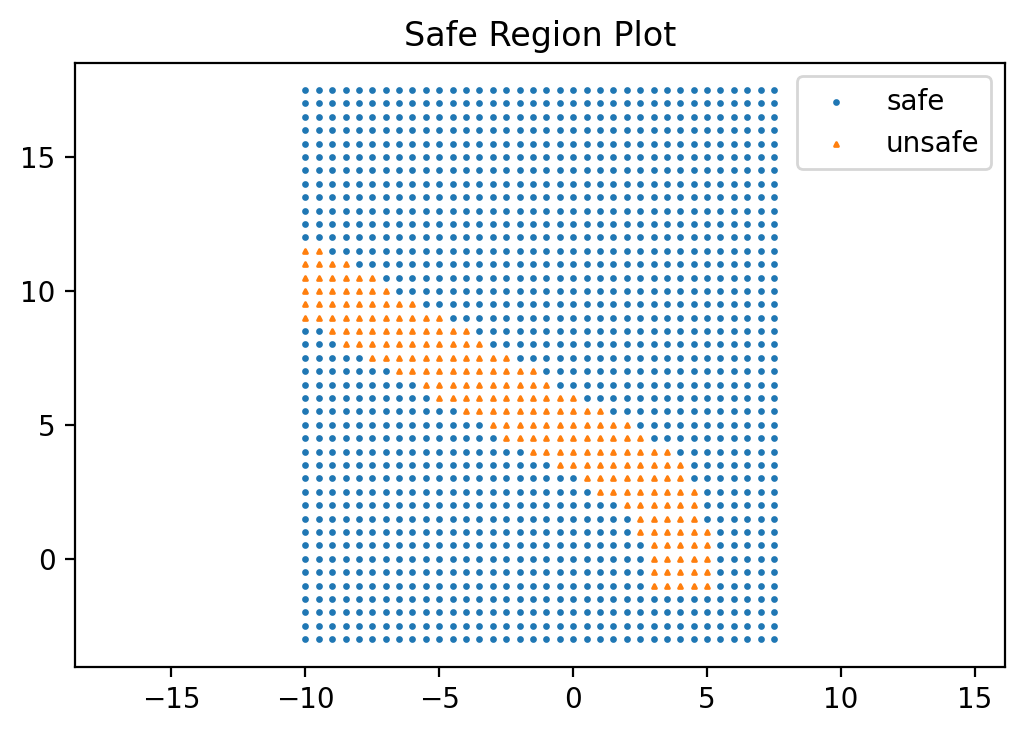

In [182]:
xbounds = [-10, 8]
ybounds = [-3, 18]
resolution = 0.5
plot_condition(x, y, clauses[0].subs(R, 4).subs(theta, pi/3), xbounds, ybounds, resolution=resolution)

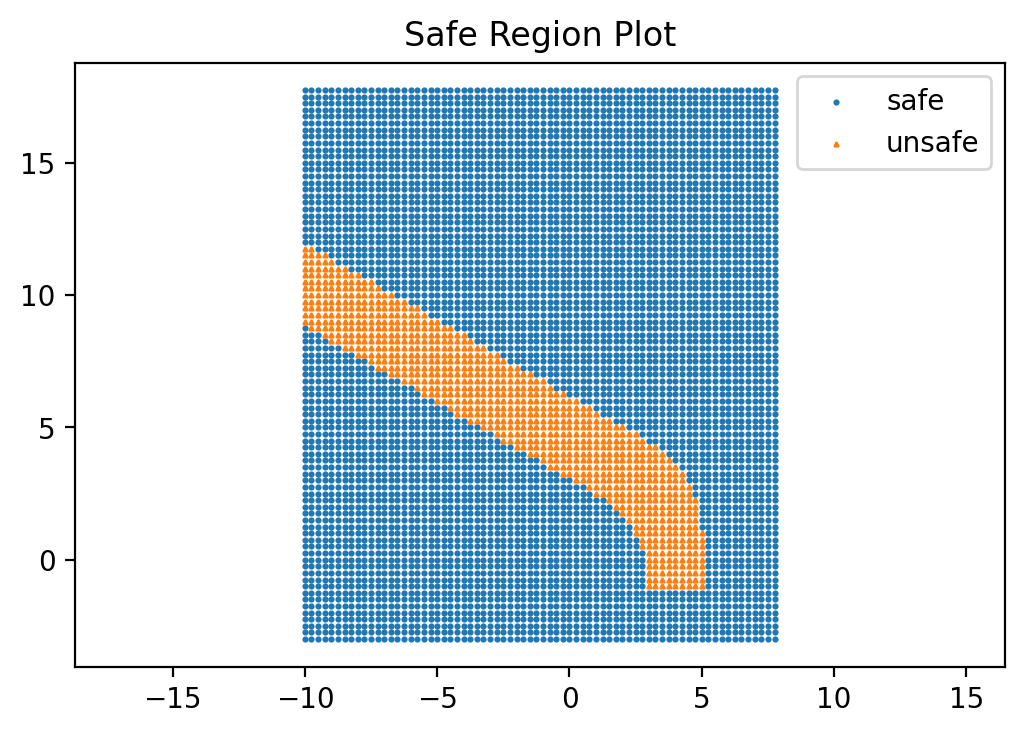

In [183]:
resolution = 0.25
plot_condition(x, y, clauses[0].subs(R, 4).subs(theta, pi/3), xbounds, ybounds, resolution=resolution)

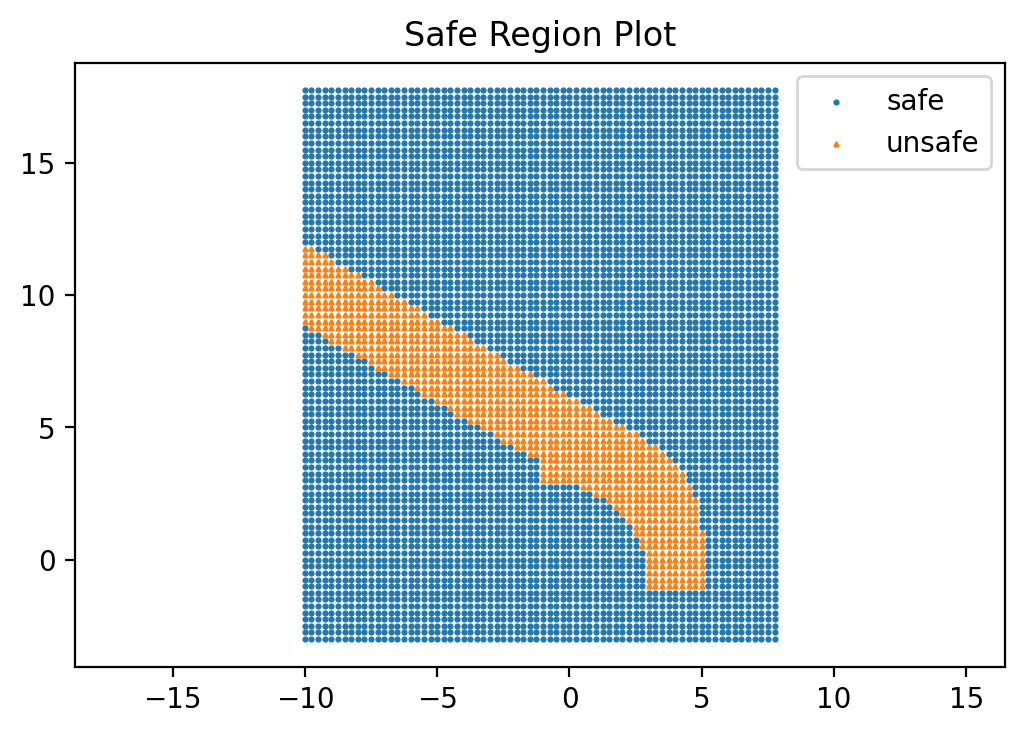

In [184]:
resolution = 0.25
plot_condition(x, y, clauses[1].subs(R, 4).subs(theta, pi/3), xbounds, ybounds, resolution=resolution)

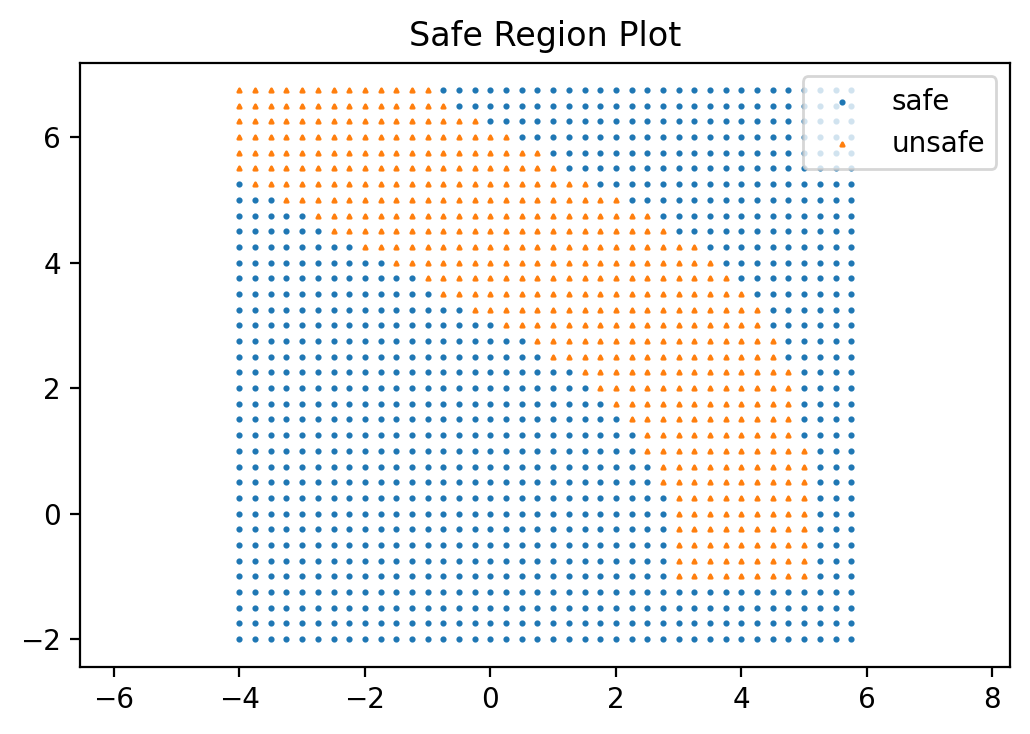

In [185]:
xbounds = [-4, 6]
ybounds = [-2, 7]
resolution = 0.25

plot_condition(x, y, clauses[0].subs(R, 4).subs(theta, pi/3), xbounds, ybounds, resolution=resolution)

## Hexagon

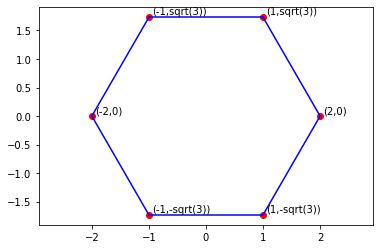

In [24]:
plot_polygon(hexagon)

In [25]:
clauses = compute_unsafe_conds_symbolic(
    x, y,
    hexagon,
    traj_piecewise,
    domain=Reals,
    intervals = [Interval(bound, R), Interval(-oo, bound)],
    print_runtime=True,
    print_orderings=True,
)

[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
Boundary(R, 0)]
[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
Transition(sqrt(3)*R/2, R/2),
Boundary(R, 0)]
[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
Transition(0, R),
Boundary(R, 0)]
[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(th

In [297]:
clauses[2].subs(R, 4).subs(theta, pi/3)

                                                                                                        
⎛        ⎛    ⎛⎧  √3⋅x                  ⎞⎞ ⎛    ⎛⎧  √3⋅(x - 4)                  ⎞⎞    ⎞   ⎛             
⎜        ⎜    ⎜⎪- ──── + 2⋅√3  for x ≤ 0⎟⎟ ⎜    ⎜⎪- ────────── + 2⋅√3  for x ≤ 4⎟⎟    ⎟   ⎜            √
⎜x ≤ 4 ∧ ⎜y - ⎜⎨   3                    ⎟⎟⋅⎜y - ⎜⎨      3                       ⎟⎟ ≤ 0⎟ ∨ ⎜x ≤ 4 ∧ x ≤ ─
⎜        ⎜    ⎜⎪                        ⎟⎟ ⎜    ⎜⎪                              ⎟⎟    ⎟   ⎜             
⎝        ⎝    ⎝⎩    2⋅√3       otherwise⎠⎠ ⎝    ⎝⎩       2⋅√3          otherwise⎠⎠    ⎠   ⎝             
                                                                                                        

                                                                                                        
      ⎛    ⎛⎧  √3⋅(x - 3)                  ⎞     ⎞ ⎛    ⎛⎧  √3⋅(x - 1)                  ⎞     ⎞    ⎞   ⎛
3⋅y   ⎜    ⎜⎪- ────────── + 2⋅√3  for x ≤ 3⎟     ⎟ ⎜  

In [29]:
xbounds = [-10, 8]
ybounds = [-3, 18]
resolution = 0.5
plot_condition(x, y, clauses[2].subs(R, 10).subs(theta, pi/3), xbounds, ybounds, resolution=resolution)

IndexError: tuple index out of range

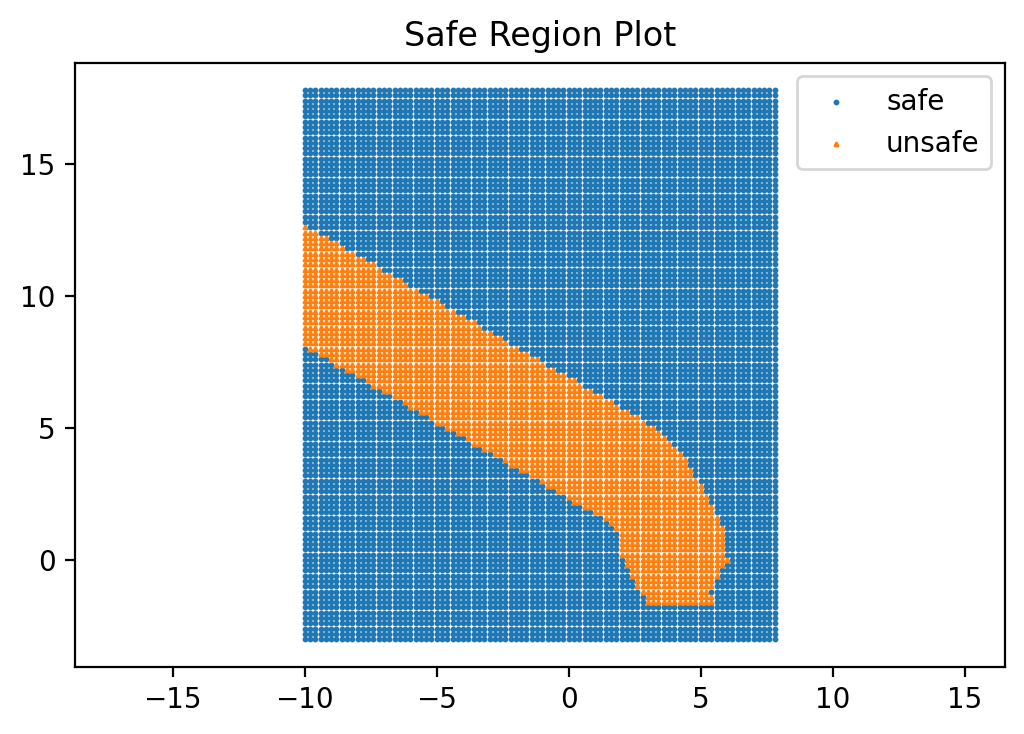

In [300]:
xbounds = [-10, 8]
ybounds = [-3, 18]
resolution = 0.2
plot_condition(x, y, clauses[2].subs(R, 4).subs(theta, pi/3), xbounds, ybounds, resolution=resolution)

In [314]:
testclauses = compute_unsafe_conds_symbolic(
    x, y,
    hexagon,
    traj_piecewise,
    domain=Reals,
    intervals = [Interval(bound, R), Interval(-oo, bound)],
    print_runtime=True,
    print_orderings=True,
    add_notches=False,
)

[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
Boundary(R, 0)]
[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
Transition(0, R),
Boundary(R, 0)]
[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
Transition(sqrt(3)*R/2, R/2),
Boundary(R, 0)]
[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(th

In [316]:
testclauses[2].subs(R, 4).subs(theta, pi/3)

                                                                                                        
⎛        ⎛    ⎛⎧  √3⋅x                  ⎞⎞ ⎛    ⎛⎧  √3⋅(x - 4)                  ⎞⎞    ⎞   ⎛             
⎜        ⎜    ⎜⎪- ──── + 2⋅√3  for x ≤ 0⎟⎟ ⎜    ⎜⎪- ────────── + 2⋅√3  for x ≤ 4⎟⎟    ⎟   ⎜            √
⎜x ≤ 4 ∧ ⎜y - ⎜⎨   3                    ⎟⎟⋅⎜y - ⎜⎨      3                       ⎟⎟ ≤ 0⎟ ∨ ⎜x ≤ 4 ∧ x ≤ ─
⎜        ⎜    ⎜⎪                        ⎟⎟ ⎜    ⎜⎪                              ⎟⎟    ⎟   ⎜             
⎝        ⎝    ⎝⎩    2⋅√3       otherwise⎠⎠ ⎝    ⎝⎩       2⋅√3          otherwise⎠⎠    ⎠   ⎝             
                                                                                                        

                                                                                                        
      ⎛    ⎛⎧  √3⋅(x - 3)                  ⎞     ⎞ ⎛    ⎛⎧  √3⋅(x - 1)                  ⎞     ⎞    ⎞   ⎛
3⋅y   ⎜    ⎜⎪- ────────── + 2⋅√3  for x ≤ 3⎟     ⎟ ⎜  

In [324]:
xbounds = [4, 6]
ybounds = [-2, 0]
resolution = 0.025

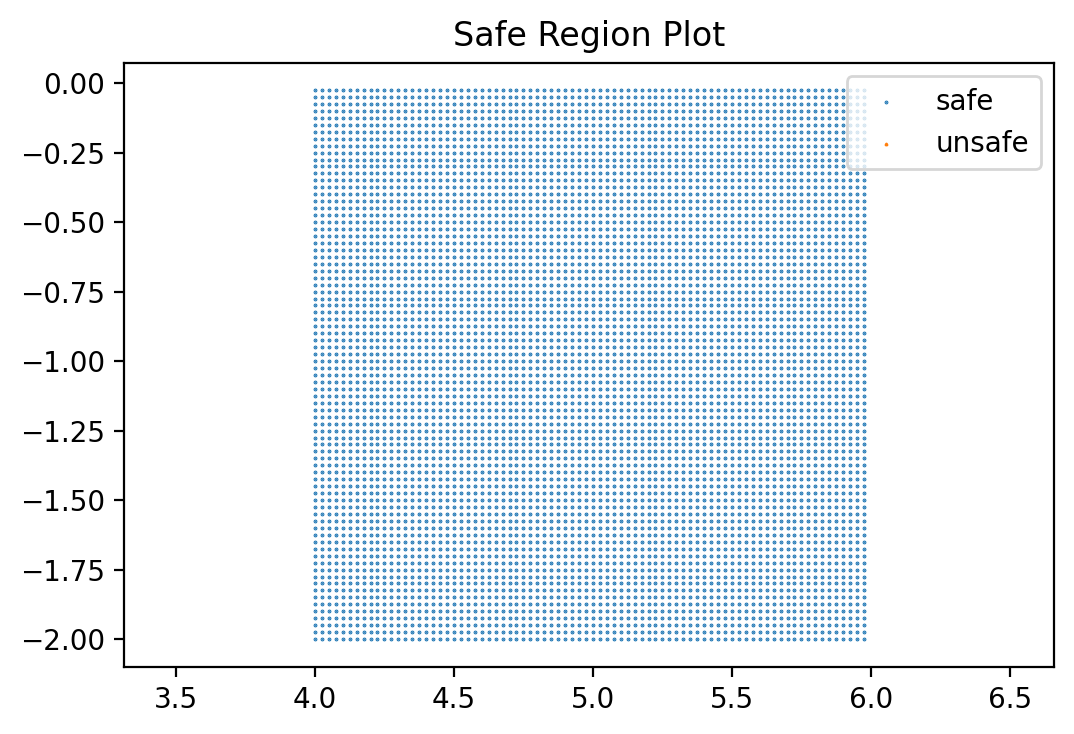

In [325]:
c1 = ((x <= 6) & (x >= -2 + 2*sqrt(3)) & (2*y*(2*y - 4) <= 0) & ((y - Piecewise((2, x < -2 + 2*sqrt(3)), (sqrt(16 - (x + 2)**2), x <= 2), (0, True)))*(y - Piecewise((2, x < 2 + 2*sqrt(3)), (sqrt(16 - (x - 2)**2), x <= 6), (0, True))) <= 0))
plot_condition(x, y, c1, xbounds, ybounds, resolution=resolution)

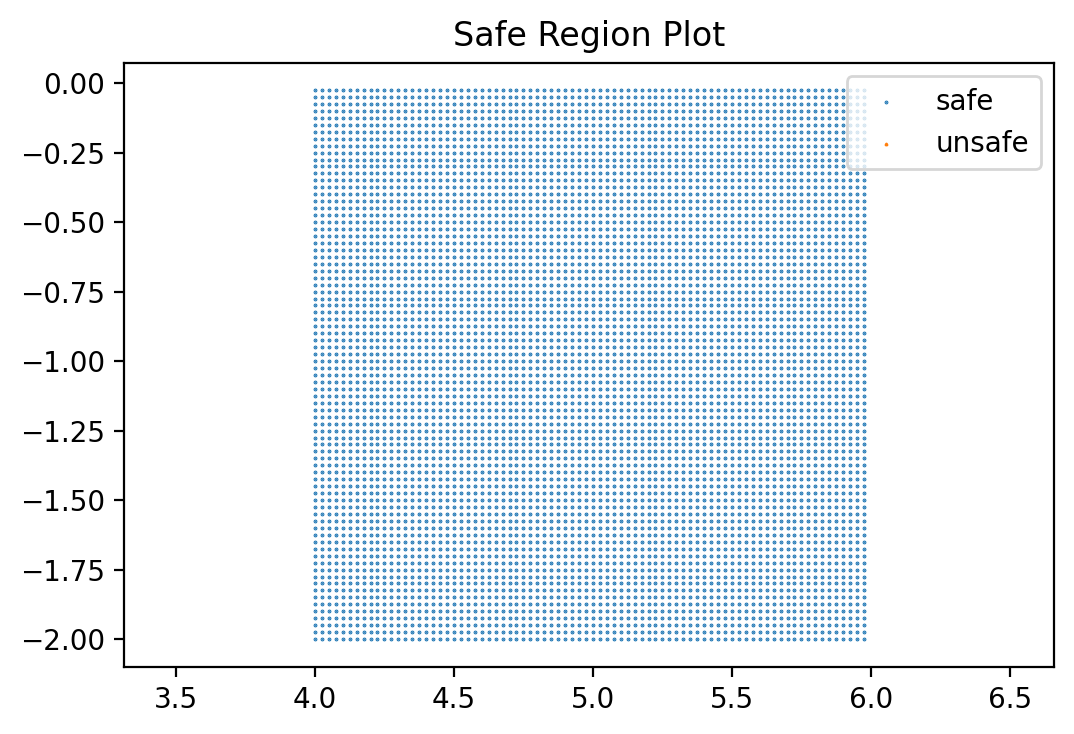

In [326]:
c2 = ((x <= 6) & (x >= -2 + 2*sqrt(3)) & ((-sqrt(3)*x + y + 4)*(-sqrt(3)*x + y + 4*sqrt(3)) <= 0) & ((y - Piecewise((2, x < -1 + 2*sqrt(3)), (sqrt(16 - (x + 1)**2), x <= 3), (0, True)) + sqrt(3))*(y - Piecewise((2, x < 1 + 2*sqrt(3)), (sqrt(16 - (x - 1)**2), x <= 5), (0, True)) - sqrt(3)) <= 0))
plot_condition(x, y, c2, xbounds, ybounds, resolution=resolution)

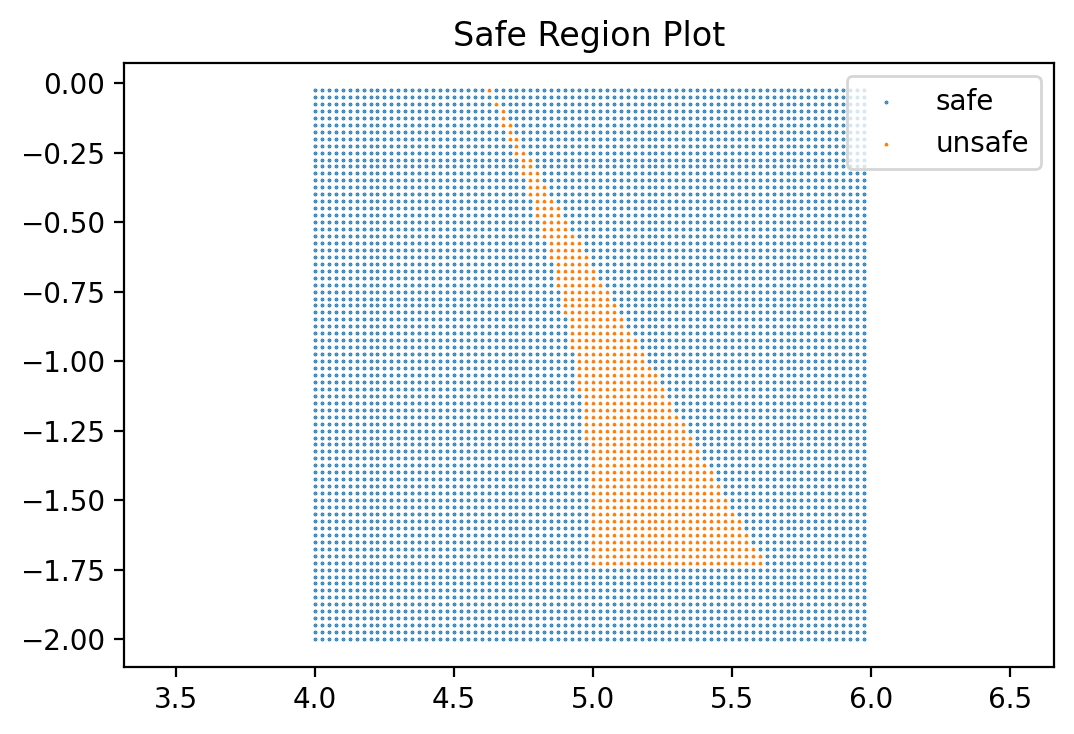

In [327]:
c3 = ((x <= 6) & (x >= -2 + 2*sqrt(3)) & ((-sqrt(3)*x - y + 8)*(-sqrt(3)*x - y + 4*sqrt(3)) <= 0) & ((y - Piecewise((2, x < -1 + 2*sqrt(3)), (sqrt(16 - (x + 1)**2), x <= 3), (0, True)) - sqrt(3))*(y - Piecewise((2, x < 1 + 2*sqrt(3)), (sqrt(16 - (x - 1)**2), x <= 5), (0, True)) + sqrt(3)) <= 0))
plot_condition(x, y, c3, xbounds, ybounds, resolution=resolution)

In [34]:
c3 = ((x <= 6) & (x >= -2 + 2*sqrt(3)) & ((-sqrt(3)*x - y + 8)*(-sqrt(3)*x - y + 4*sqrt(3)) <= 0) & ((y - Piecewise((2, x < -1 + 2*sqrt(3)), (sqrt(16 - (x + 1)**2), x <= 3), (0, True)) - sqrt(3))*(y - Piecewise((2, x < 1 + 2*sqrt(3)), (sqrt(16 - (x - 1)**2), x <= 5), (0, True)) + sqrt(3)) <= 0))
c3

                        ⎛    ⎛⎧        2           for x < -1 + 2⋅√3⎞     ⎞ ⎛    ⎛⎧        2           f
                        ⎜    ⎜⎪                                     ⎟     ⎟ ⎜    ⎜⎪                     
                        ⎜    ⎜⎪   _______________                   ⎟     ⎟ ⎜    ⎜⎪   _______________   
x ≥ -2 + 2⋅√3 ∧ x ≤ 6 ∧ ⎜y - ⎜⎨  ╱             2                    ⎟ - √3⎟⋅⎜y - ⎜⎨  ╱             2    
                        ⎜    ⎜⎪╲╱  16 - (x + 1)        for x ≤ 3    ⎟     ⎟ ⎜    ⎜⎪╲╱  16 - (x - 1)     
                        ⎜    ⎜⎪                                     ⎟     ⎟ ⎜    ⎜⎪                     
                        ⎝    ⎝⎩        0               otherwise    ⎠     ⎠ ⎝    ⎝⎩        0            

or x < 1 + 2⋅√3⎞     ⎞                                             
               ⎟     ⎟                                             
               ⎟     ⎟                                             
               ⎟ + √3⎟ ≤ 0 ∧ (-√3⋅x - y + 8)⋅(-√3⋅x - y + 4⋅

In [330]:
traj_piecewise.subs(R, 4).subs(theta, pi/3)

⎧      _________               
⎪     ╱       2                
⎪   ╲╱  16 - x        for x > 2
⎨                              
⎪  √3⋅(x - 2)                  
⎪- ────────── + 2⋅√3  otherwise
⎩      3                       

In [331]:
bound.subs(R, 4).subs(theta, pi/3)

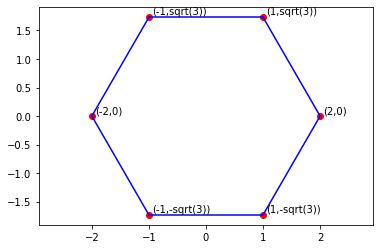

In [334]:
plot_polygon(hexagon)

In [340]:
c3

                        ⎛    ⎛⎧        2           for x < -1 + 2⋅√3⎞     ⎞ ⎛    ⎛⎧        2           f
                        ⎜    ⎜⎪                                     ⎟     ⎟ ⎜    ⎜⎪                     
                        ⎜    ⎜⎪   _______________                   ⎟     ⎟ ⎜    ⎜⎪   _______________   
x ≥ -2 + 2⋅√3 ∧ x ≤ 6 ∧ ⎜y - ⎜⎨  ╱             2                    ⎟ - √3⎟⋅⎜y - ⎜⎨  ╱             2    
                        ⎜    ⎜⎪╲╱  16 - (x + 1)        for x ≤ 3    ⎟     ⎟ ⎜    ⎜⎪╲╱  16 - (x - 1)     
                        ⎜    ⎜⎪                                     ⎟     ⎟ ⎜    ⎜⎪                     
                        ⎝    ⎝⎩        0               otherwise    ⎠     ⎠ ⎝    ⎝⎩        0            

or x < 1 + 2⋅√3⎞     ⎞                                             
               ⎟     ⎟                                             
               ⎟     ⎟                                             
               ⎟ + √3⎟ ≤ 0 ∧ (-√3⋅x - y + 8)⋅(-√3⋅x - y + 4⋅

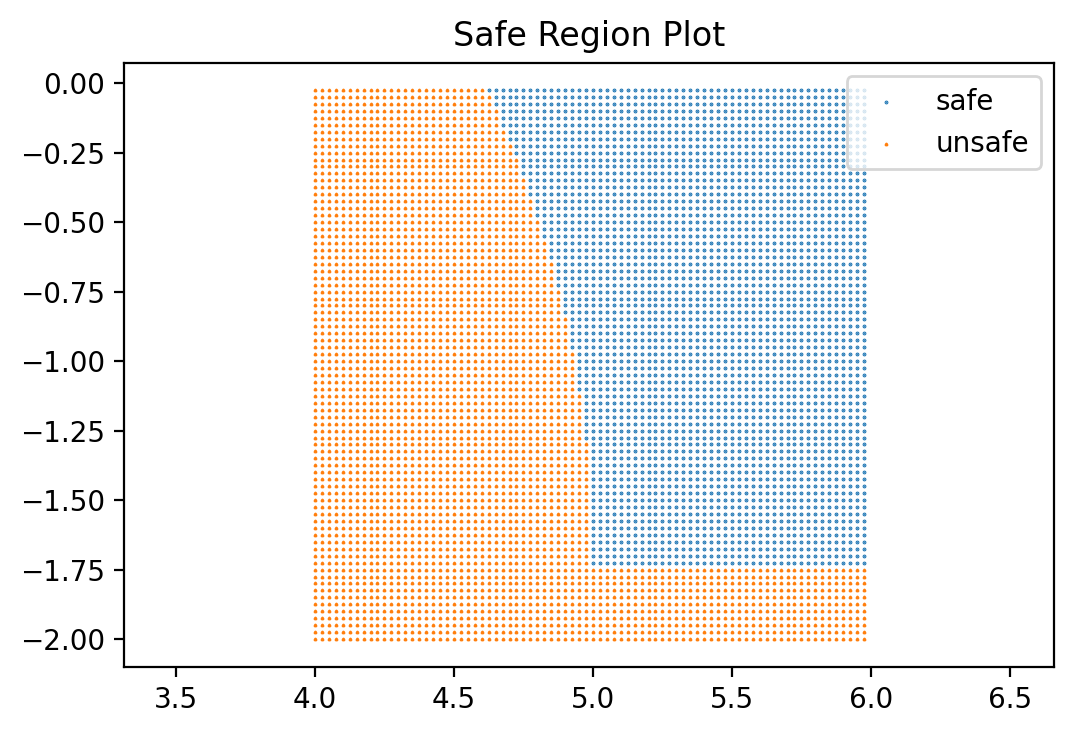

In [32]:
xbounds = [4, 6]
ybounds = [-2, 0]
resolution = 0.025
c3_g_only = ~(((y - Piecewise((2, x < -1 + 2*sqrt(3)), (sqrt(16 - (x + 1)**2), x <= 3), (0, True)) - sqrt(3))*(y - Piecewise((2, x < 1 + 2*sqrt(3)), (sqrt(16 - (x - 1)**2), x <= 5), (0, True)) + sqrt(3)) <= 0))
plot_condition(x, y, c3_g_only, xbounds, ybounds, resolution=resolution)

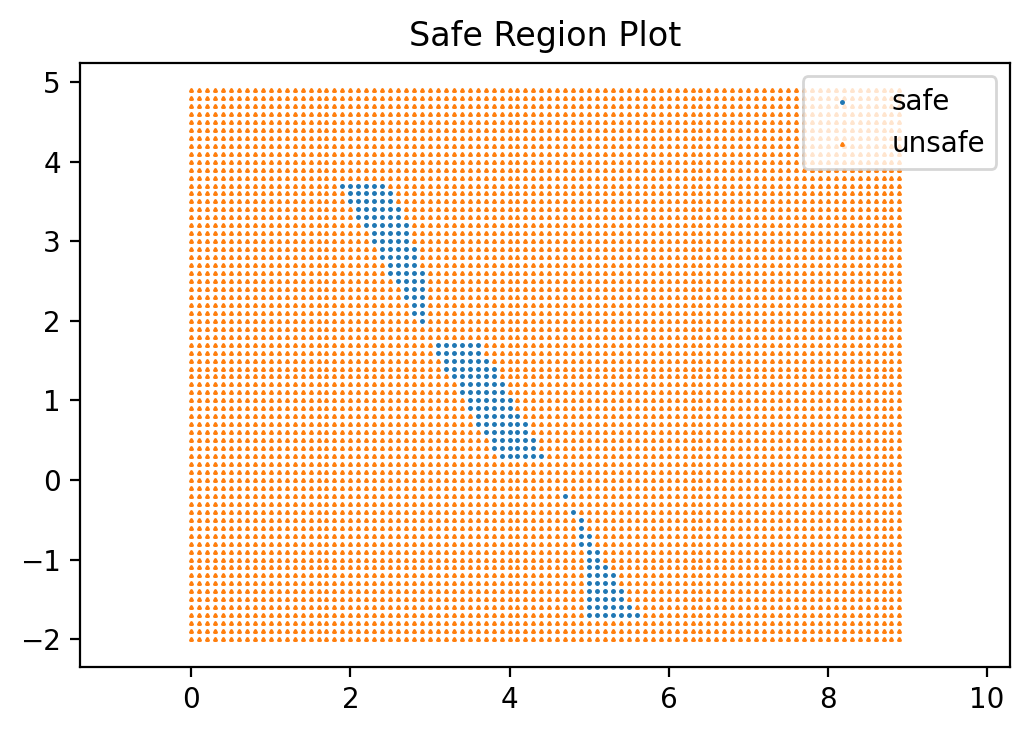

In [42]:
c3 = ((x <= 6) & (x >= -2 + 2*sqrt(3)) & ((-sqrt(3)*x - y + 8)*(-sqrt(3)*x - y + 4*sqrt(3)) <= 0) & ((y - Piecewise((2, x < -1 + 2*sqrt(3)), (sqrt(16 - (x + 1)**2), x <= 3), (0, True)) - sqrt(3))*(y - Piecewise((2, x < 1 + 2*sqrt(3)), (sqrt(16 - (x - 1)**2), x <= 5), (0, True)) + sqrt(3)) <= 0))
plot_condition(x, y, ~c3, (0, 9), (-2, 5), resolution=0.1)

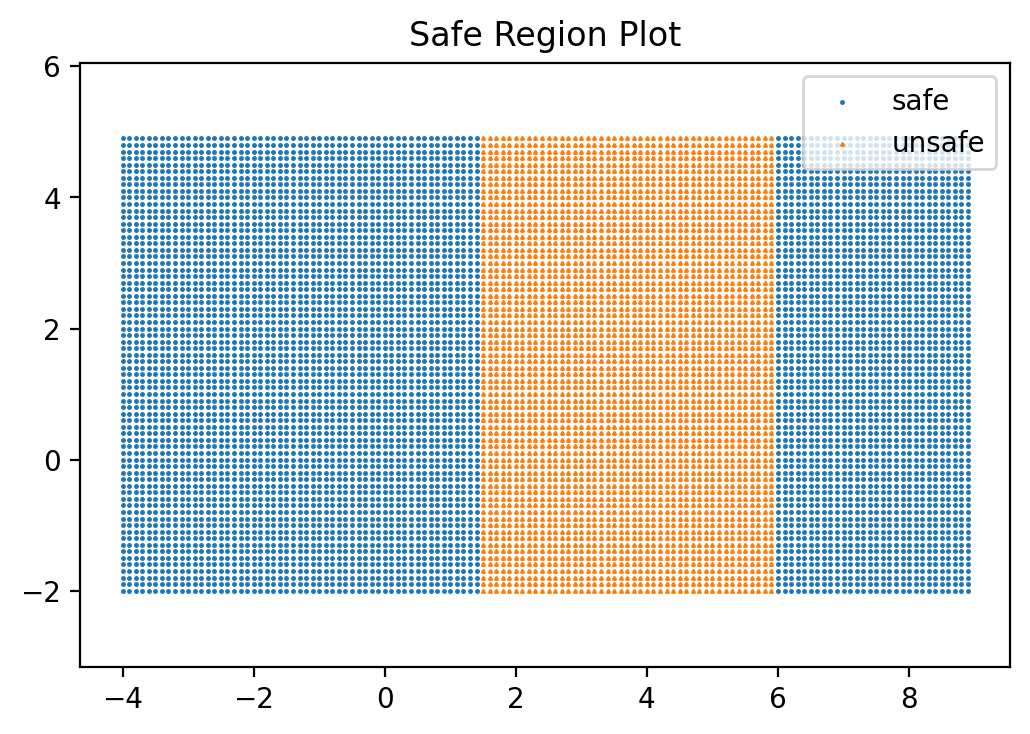

In [39]:

plot_condition(x, y, (x <= 6) & (x >= -2 + 2*sqrt(3)), (-4, 9), (-2, 5), resolution=0.1)

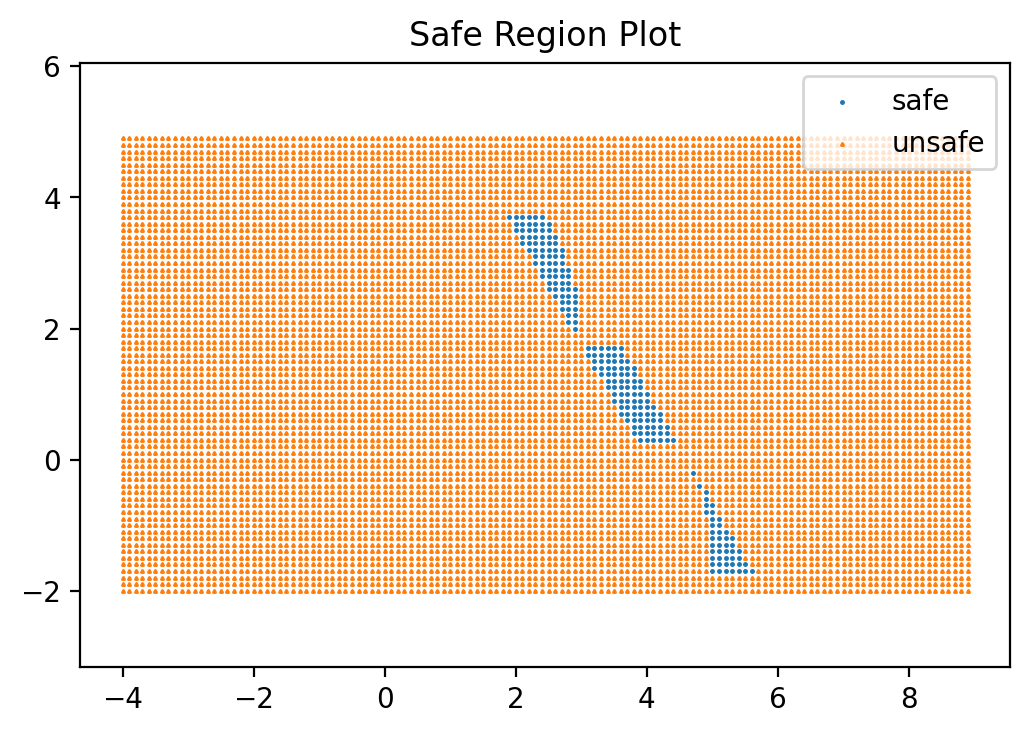

In [43]:
c3 = ((x <= 6) & (x >= -2 + 2*sqrt(3)) & ((-sqrt(3)*x - y + 8)*(-sqrt(3)*x - y + 4*sqrt(3)) <= 0) & ((y - Piecewise((2, x < -1 + 2*sqrt(3)), (sqrt(16 - (x + 1)**2), x <= 3), (0, True)) - sqrt(3))*(y - Piecewise((2, x < 1 + 2*sqrt(3)), (sqrt(16 - (x - 1)**2), x <= 5), (0, True)) + sqrt(3)) <= 0))
plot_condition(x, y, ~c3, (-4, 9), (-2, 5), resolution=0.1)

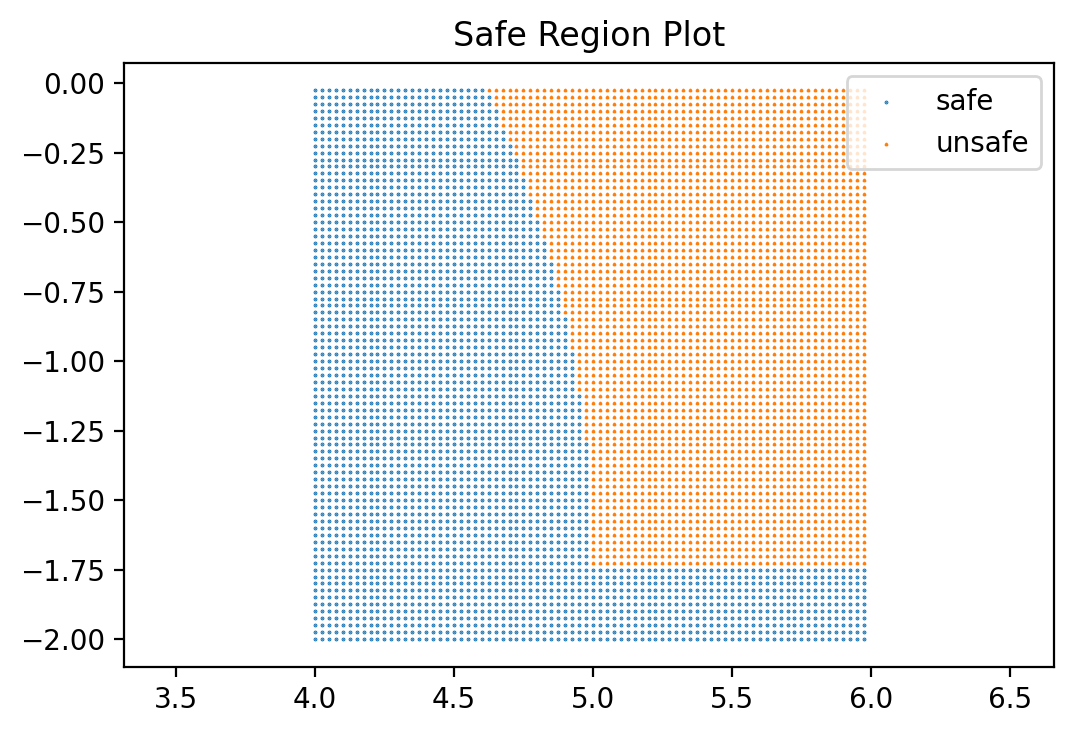

In [341]:
c3_g_only = (((y - Piecewise((2, x < -1 + 2*sqrt(3)), (sqrt(16 - (x + 1)**2), x <= 3), (0, True)) - sqrt(3))*(y - Piecewise((2, x < 1 + 2*sqrt(3)), (sqrt(16 - (x - 1)**2), x <= 5), (0, True)) + sqrt(3)) <= 0))
plot_condition(x, y, c3_g_only, xbounds, ybounds, resolution=resolution)

In [342]:
c3_g_only

⎛    ⎛⎧        2           for x < -1 + 2⋅√3⎞     ⎞ ⎛    ⎛⎧        2           for x < 1 + 2⋅√3⎞     ⎞  
⎜    ⎜⎪                                     ⎟     ⎟ ⎜    ⎜⎪                                    ⎟     ⎟  
⎜    ⎜⎪   _______________                   ⎟     ⎟ ⎜    ⎜⎪   _______________                  ⎟     ⎟  
⎜y - ⎜⎨  ╱             2                    ⎟ - √3⎟⋅⎜y - ⎜⎨  ╱             2                   ⎟ + √3⎟ ≤
⎜    ⎜⎪╲╱  16 - (x + 1)        for x ≤ 3    ⎟     ⎟ ⎜    ⎜⎪╲╱  16 - (x - 1)       for x ≤ 5    ⎟     ⎟  
⎜    ⎜⎪                                     ⎟     ⎟ ⎜    ⎜⎪                                    ⎟     ⎟  
⎝    ⎝⎩        0               otherwise    ⎠     ⎠ ⎝    ⎝⎩        0              otherwise    ⎠     ⎠  

  
  
  
 0
  
  
  

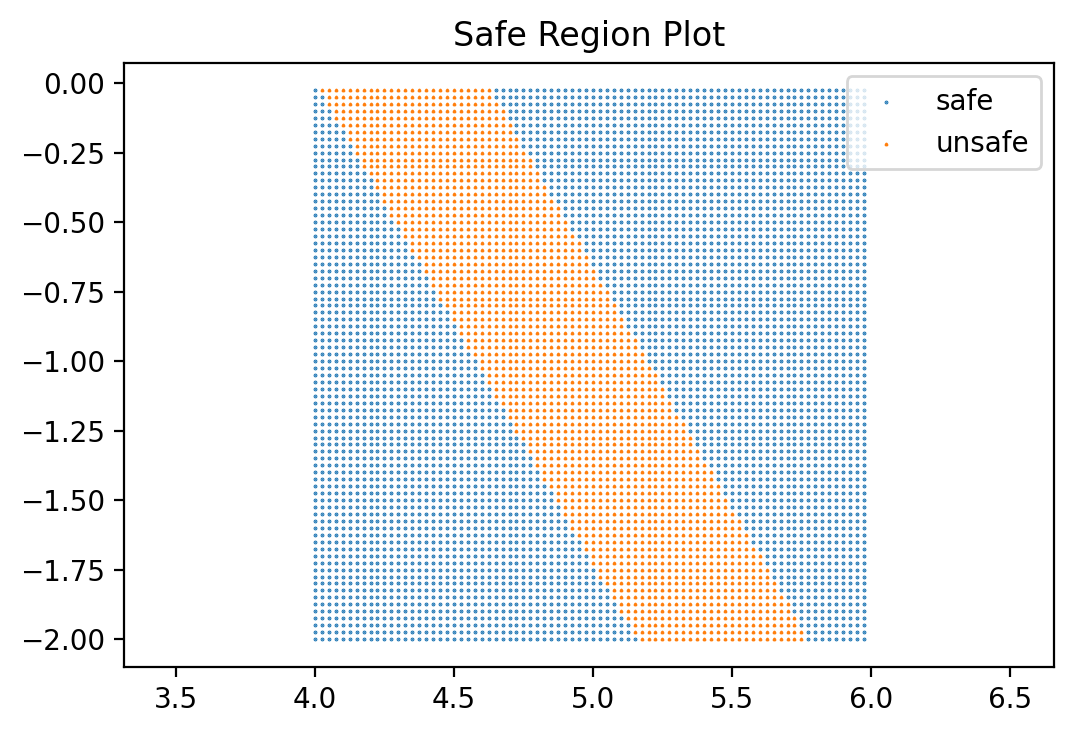

In [421]:
c3_corner_and_box = ((x <= 6) & (x >= -2 + 2*sqrt(3)) & ((-sqrt(3)*x - y + 8)*(-sqrt(3)*x - y + 4*sqrt(3)) <= 0))
plot_condition(x, y, c3_corner_and_box, xbounds, ybounds, resolution=resolution)

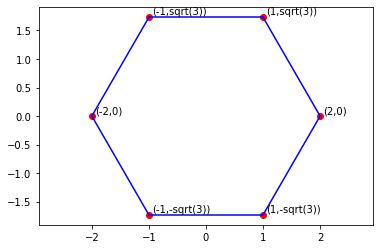

In [422]:
plot_polygon(hexagon)

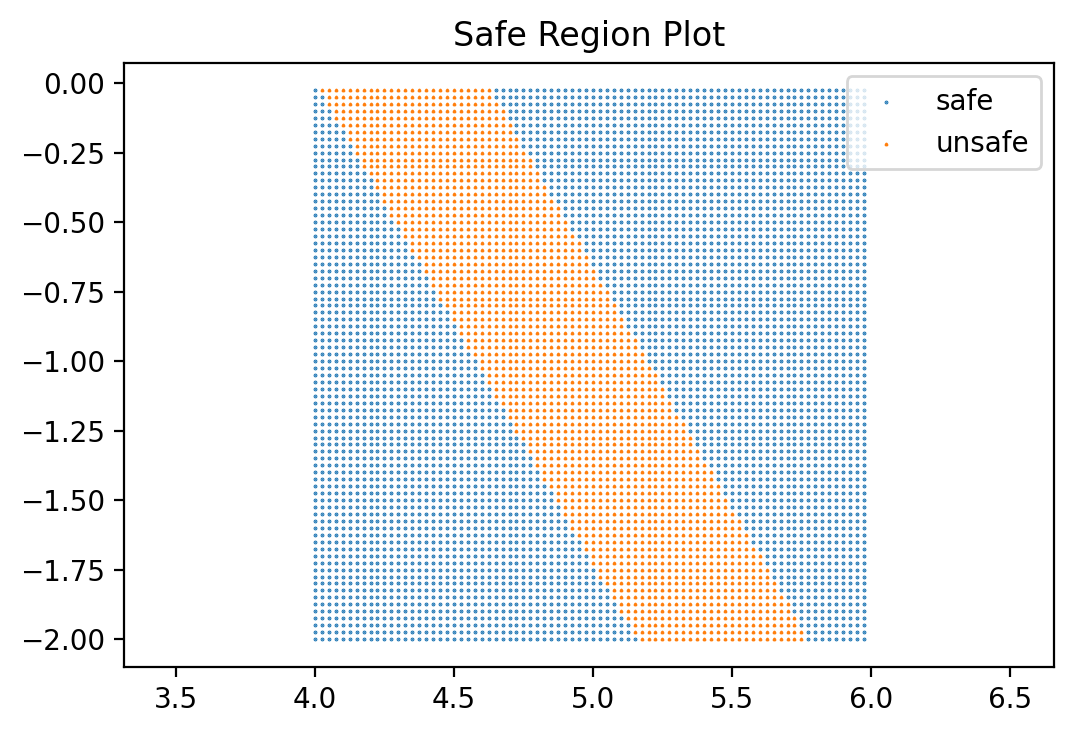

In [343]:
c3_corner_only = (((-sqrt(3)*x - y + 8)*(-sqrt(3)*x - y + 4*sqrt(3)) <= 0))
plot_condition(x, y, c3_corner_only, xbounds, ybounds, resolution=resolution)

In [344]:
c3_corner_only

In [418]:
print(c3_corner_only)

(-sqrt(3)*x - y + 8)*(-sqrt(3)*x - y + 4*sqrt(3)) <= 0


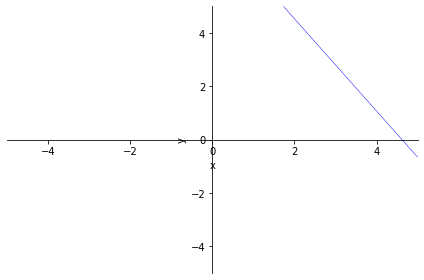

In [419]:
plot_implicit(-sqrt(3)*x - y + 8)

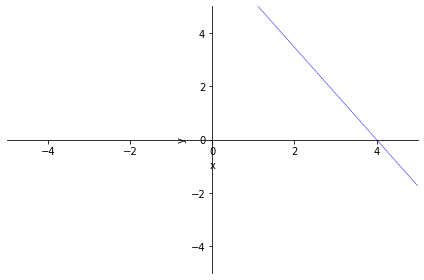

In [420]:
plot_implicit(-sqrt(3)*x - y + 4*sqrt(3))

In [460]:
testclauses[2].subs(R, 4).subs(theta, pi/3)

                                                                                                        
⎛        ⎛    ⎛⎧  √3⋅x                  ⎞⎞ ⎛    ⎛⎧  √3⋅(x - 4)                  ⎞⎞    ⎞   ⎛             
⎜        ⎜    ⎜⎪- ──── + 2⋅√3  for x ≤ 0⎟⎟ ⎜    ⎜⎪- ────────── + 2⋅√3  for x ≤ 4⎟⎟    ⎟   ⎜            √
⎜x ≤ 4 ∧ ⎜y - ⎜⎨   3                    ⎟⎟⋅⎜y - ⎜⎨      3                       ⎟⎟ ≤ 0⎟ ∨ ⎜x ≤ 4 ∧ x ≤ ─
⎜        ⎜    ⎜⎪                        ⎟⎟ ⎜    ⎜⎪                              ⎟⎟    ⎟   ⎜             
⎝        ⎝    ⎝⎩    2⋅√3       otherwise⎠⎠ ⎝    ⎝⎩       2⋅√3          otherwise⎠⎠    ⎠   ⎝             
                                                                                                        

                                                                                                        
      ⎛    ⎛⎧  √3⋅(x - 3)                  ⎞     ⎞ ⎛    ⎛⎧  √3⋅(x - 1)                  ⎞     ⎞    ⎞   ⎛
3⋅y   ⎜    ⎜⎪- ────────── + 2⋅√3  for x ≤ 3⎟     ⎟ ⎜  

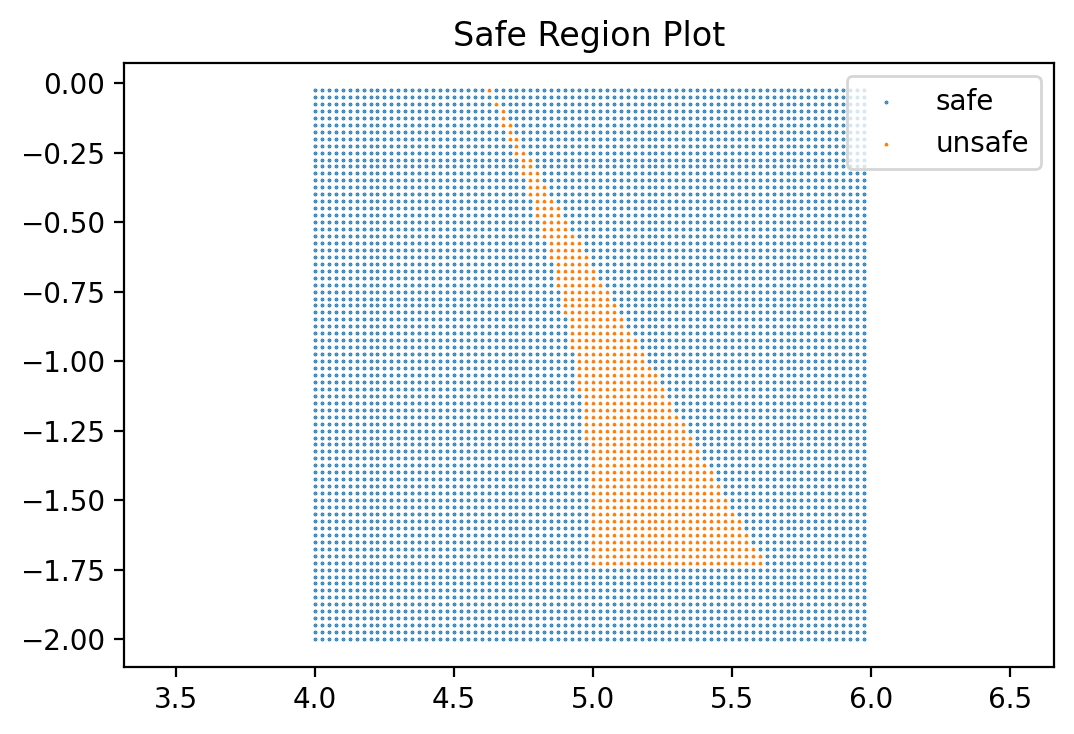

In [318]:
xbounds = [4, 6]
ybounds = [-2, 0]
resolution = 0.025
plot_condition(x, y, testclauses[2].subs(R, 4).subs(theta, pi/3), xbounds, ybounds, resolution=resolution)

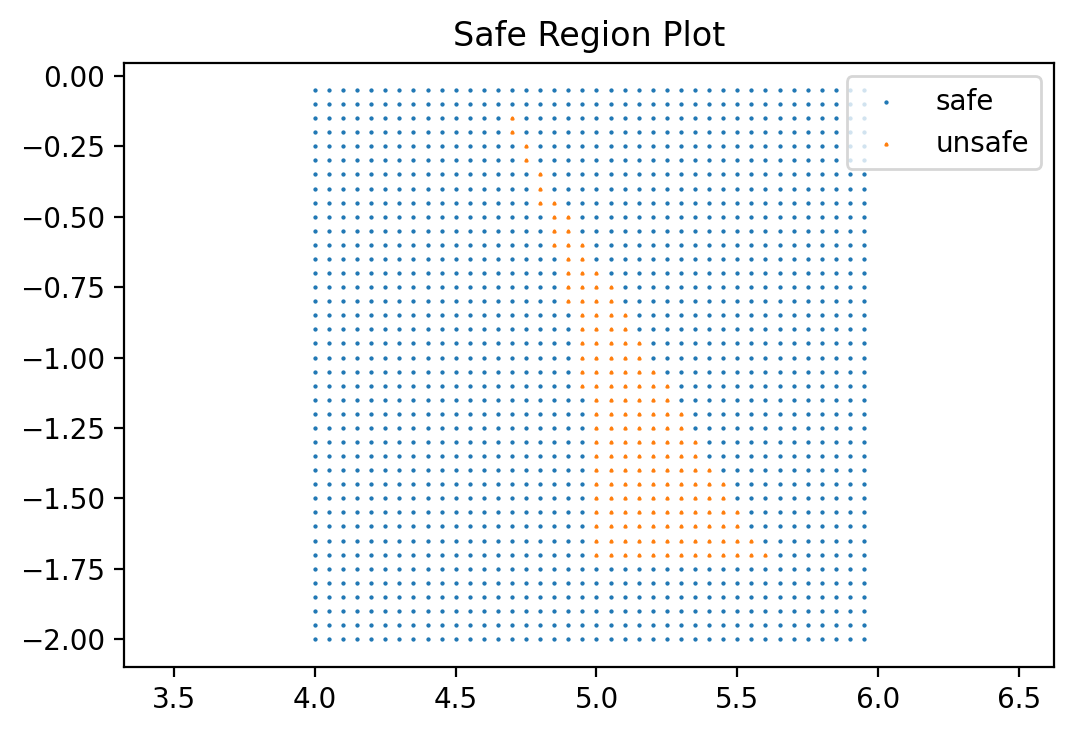

In [319]:
xbounds = [4, 6]
ybounds = [-2, 0]
resolution = 0.05
plot_condition(x, y, testclauses[2].subs(R, 4).subs(theta, pi/3), xbounds, ybounds, resolution=resolution)

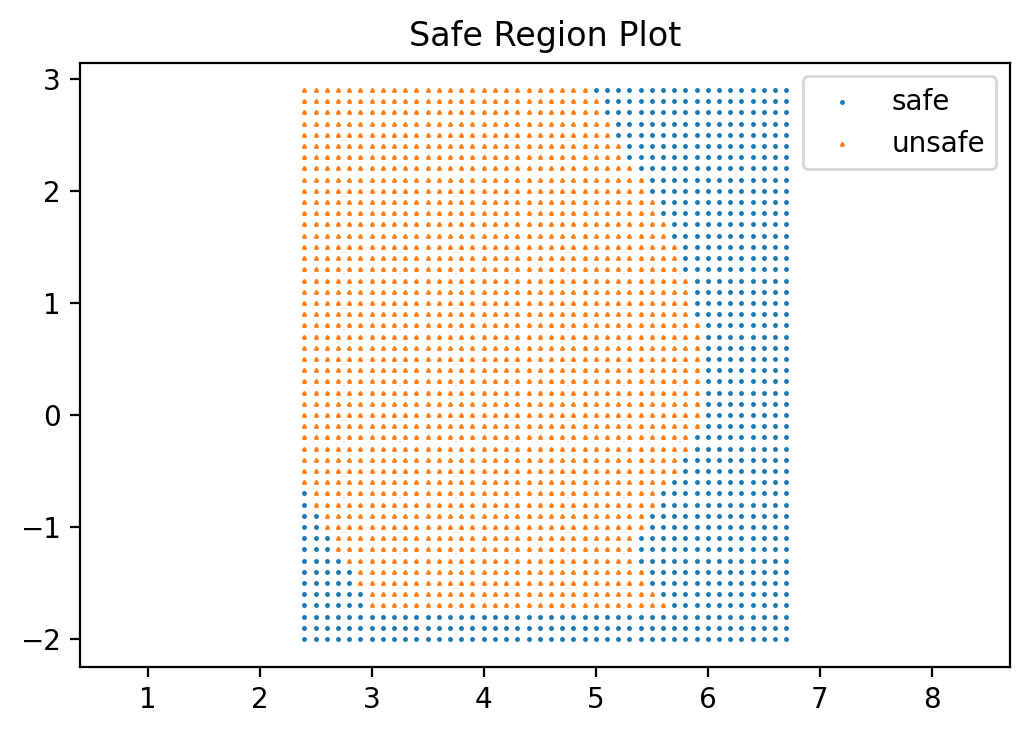

In [310]:
xbounds = [2.4, 6.7]
ybounds = [-2, 3]
resolution = 0.1
plot_condition(x, y, clauses[2].subs(R, 4).subs(theta, pi/3), xbounds, ybounds, resolution=resolution)

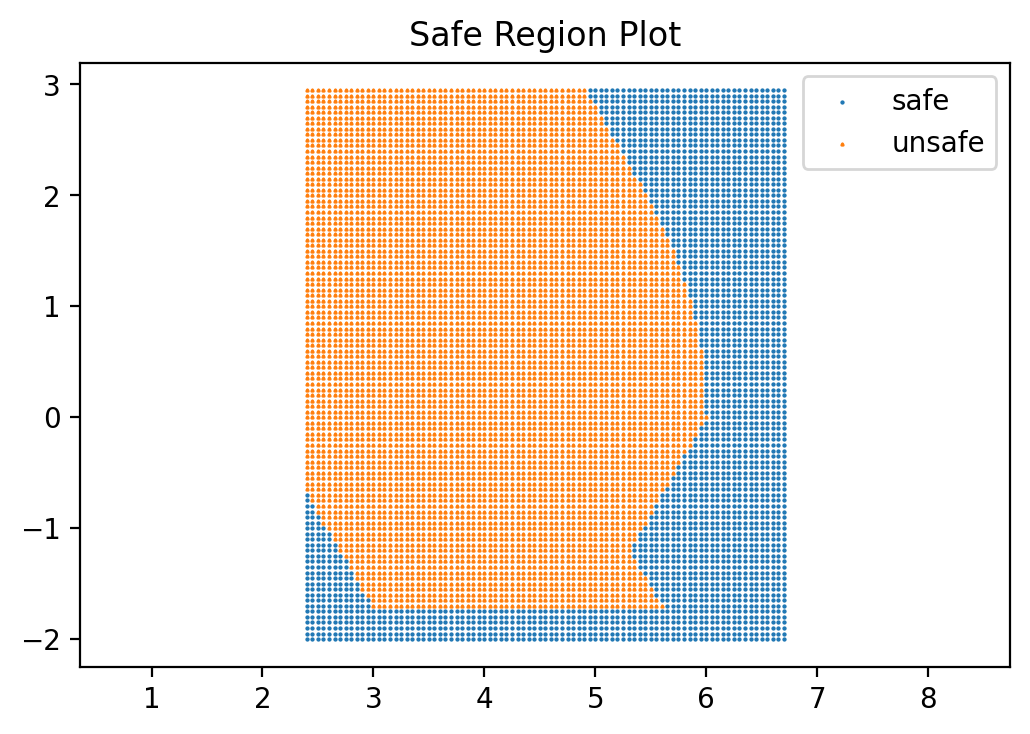

In [311]:
xbounds = [2.4, 6.7]
ybounds = [-2, 3]
resolution = 0.05
plot_condition(x, y, clauses[2].subs(R, 4).subs(theta, pi/3), xbounds, ybounds, resolution=resolution)

In [312]:
clauses[2].subs(R, 4).subs(theta, pi/3)

                                                                                                        
⎛        ⎛    ⎛⎧  √3⋅x                  ⎞⎞ ⎛    ⎛⎧  √3⋅(x - 4)                  ⎞⎞    ⎞   ⎛             
⎜        ⎜    ⎜⎪- ──── + 2⋅√3  for x ≤ 0⎟⎟ ⎜    ⎜⎪- ────────── + 2⋅√3  for x ≤ 4⎟⎟    ⎟   ⎜            √
⎜x ≤ 4 ∧ ⎜y - ⎜⎨   3                    ⎟⎟⋅⎜y - ⎜⎨      3                       ⎟⎟ ≤ 0⎟ ∨ ⎜x ≤ 4 ∧ x ≤ ─
⎜        ⎜    ⎜⎪                        ⎟⎟ ⎜    ⎜⎪                              ⎟⎟    ⎟   ⎜             
⎝        ⎝    ⎝⎩    2⋅√3       otherwise⎠⎠ ⎝    ⎝⎩       2⋅√3          otherwise⎠⎠    ⎠   ⎝             
                                                                                                        

                                                                                                        
      ⎛    ⎛⎧  √3⋅(x - 3)                  ⎞     ⎞ ⎛    ⎛⎧  √3⋅(x - 1)                  ⎞     ⎞    ⎞   ⎛
3⋅y   ⎜    ⎜⎪- ────────── + 2⋅√3  for x ≤ 3⎟     ⎟ ⎜  

In [263]:
clauses[2]

                                                                                                        
                                                                                                        
                                                                                                        
                                                                                                        
                                                                                                        
                                                                                                        
                                                                                                        
⎛                           ⎛    ⎛⎧                -R⋅cos(θ) + x - 2                       R            
⎜                           ⎜    ⎜⎪     R⋅sin(θ) - ─────────────────        for x ≤ ──────────────── + 2
⎜                           ⎜    ⎜⎪                    

In [175]:
(sqrt(R**2 - R**2/(tan(theta)**2 + 1))).subs(R, 4).subs(theta, pi/3)

In [176]:
(R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)).subs(R, 4).subs(theta, pi/3)

In [207]:
transitions, lookup, func_var = compute_all_transitions(
    x, y,
    hexagon,
    traj_piecewise,
    domain = Reals, 
    intervals = [Interval(bound, R), Interval(-oo, bound)],
)
transitions

{Boundary(-oo, R*sin(theta) + oo/tan(theta)),
 Boundary(R, 0),
 Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
 Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
 Transition(-sqrt(3)*R/2, R/2),
 Transition(0, R),
 Transition(sqrt(3)*R/2, R/2)}

In [210]:
t0 = time.time()
transition_orderings = sort_or_order(transitions, lookup, func_var)
print(f"Took {time.time()-t0} seconds to compute", 
      f"{len(transition_orderings)} possible orderings.")
transition_orderings

Took 0.0011761188507080078 seconds to compute 4 possible orderings.


[[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
  Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
  Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
  Boundary(R, 0)],
 [Boundary(-oo, R*sin(theta) + oo/tan(theta)),
  Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
  Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
  Transition(0, R),
  Boundary(R, 0)],
 [Boundary(-oo, R*sin(theta) + oo/tan(theta)),
  Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
  Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
  Transition(sqrt(3)*R/2, R/2),
  Boundary(R, 0)],
 [Boundary(-oo, R*sin(theta) + oo/tan(theta)),
  Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
  Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(

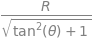

In [212]:
R/sqrt(tan(theta)**2 + 1)

In [ ]:
R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)

In [221]:
(R*sin(theta) + R*cos(theta)/tan(theta)).is_finite

In [222]:
generate_clause(x,y, hexagon, traj_piecewise, transition_orderings[3], lookup, add_notches=False)

                                                                                                        
                                                                                                        
                                                                                                        
                                                                                                        
                                                                                                        
                                                                                                        
⎛                           ⎛    ⎛⎧                -R⋅cos(θ) + x - 2                       R            
⎜                           ⎜    ⎜⎪     R⋅sin(θ) - ─────────────────        for x ≤ ──────────────── + 2
⎜                           ⎜    ⎜⎪                      tan(θ)                        _____________    
⎜                           ⎜    ⎜⎪                    

In [130]:
t0 = time.time()
clauses = [generate_clause(x,y, hexagon, traj_piecewise, sorted_transitions, lookup, add_notches=False)
           for sorted_transitions in transition_orderings]
print(f"Took {time.time()-t0} seconds to compute {len(clauses)} clauses")

Took 0.1704120635986328 seconds to compute 4 clauses


# Testing: instantiation to identify orderings

In [347]:
clauses

⎡                                                                                                       
⎢                                                                                                       
⎢                                                                                                       
⎢                                                                                                       
⎢                                                                                                       
⎢                                                                                                       
⎢                                                                                                       
⎢⎛                           ⎛    ⎛⎧                -R⋅cos(θ) + x - 2                       R           
⎢⎜                           ⎜    ⎜⎪     R⋅sin(θ) - ─────────────────        for x ≤ ──────────────── + 
⎢⎜                           ⎜    ⎜⎪                   

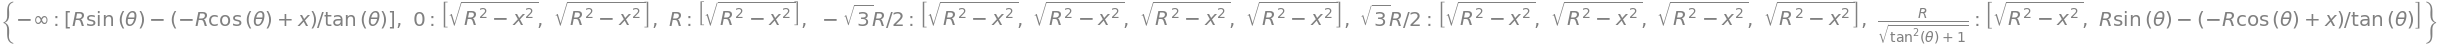

In [348]:
lookup

In [ ]:
clauses_acas, explicit_acas = compute_unsafe_conds_symbolic(
    x, y,
    square_param,
    traj_piecewise,
    domain=Reals,
    intervals = [Interval(bound, R), Interval(-oo, bound)],
    print_runtime=True,
    print_orderings=True,
)

In [429]:
clauses, explicit = compute_unsafe_conds_symbolic(
    x, y,
    hexagon,
    traj_piecewise,
    domain=Reals,
    intervals = [Interval(bound, R), Interval(-oo, bound)],
    print_runtime=True,
    print_orderings=True,
)

[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
Boundary(R, 0)]
[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
Transition(0, R),
Boundary(R, 0)]
[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
Transition(sqrt(3)*R/2, R/2),
Boundary(R, 0)]
[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(th

In [447]:
t0 = time.time()
params = [(R, 4), (theta, pi/3)]
numeric = explicit.instantiate(params)
print(f"took {time.time() - t0} seconds to instantiate")
print(numeric.ordering)
numeric.clause

took 0.0018110275268554688 seconds to instantiate
[Boundary(-oo, R*sin(theta) + oo/tan(theta)), Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)), Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))), Transition(sqrt(3)*R/2, R/2), Boundary(R, 0)]


                                                                                                        
⎛        ⎛    ⎛⎧  √3⋅x                  ⎞⎞ ⎛    ⎛⎧  √3⋅(x - 4)                  ⎞⎞    ⎞   ⎛             
⎜        ⎜    ⎜⎪- ──── + 2⋅√3  for x ≤ 0⎟⎟ ⎜    ⎜⎪- ────────── + 2⋅√3  for x ≤ 4⎟⎟    ⎟   ⎜            √
⎜x ≤ 4 ∧ ⎜y - ⎜⎨   3                    ⎟⎟⋅⎜y - ⎜⎨      3                       ⎟⎟ ≤ 0⎟ ∨ ⎜x ≤ 4 ∧ x ≤ ─
⎜        ⎜    ⎜⎪                        ⎟⎟ ⎜    ⎜⎪                              ⎟⎟    ⎟   ⎜             
⎝        ⎝    ⎝⎩    2⋅√3       otherwise⎠⎠ ⎝    ⎝⎩       2⋅√3          otherwise⎠⎠    ⎠   ⎝             
                                                                                                        

                                                                                                        
      ⎛    ⎛⎧  √3⋅(x - 3)                  ⎞     ⎞ ⎛    ⎛⎧  √3⋅(x - 1)                  ⎞     ⎞    ⎞   ⎛
3⋅y   ⎜    ⎜⎪- ────────── + 2⋅√3  for x ≤ 3⎟     ⎟ ⎜  

In [408]:
testclauses, formulation = compute_unsafe_conds_symbolic(
    x, y,
    hexagon,
    traj_piecewise,
    domain=Reals,
    intervals = [Interval(bound, R), Interval(-oo, bound)],
    print_runtime=True,
    print_orderings=True,
)

[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Boundary(R, 0)]
[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Transition(0, R),
Boundary(R, 0)]
[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
Transition(sqrt(3)*R/2, R/2),
Boundary(R, 0)]
[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1

In [410]:
formulation.clauses

⎡                                                                                                       
⎢                                                                                                       
⎢                                                                                                       
⎢                                                                                                       
⎢                                                                                                       
⎢                                                                                                       
⎢                                                                                                       
⎢⎛                           ⎛    ⎛⎧                -R⋅cos(θ) + x - 2                       R           
⎢⎜                           ⎜    ⎜⎪     R⋅sin(θ) - ─────────────────        for x ≤ ──────────────── + 
⎢⎜                           ⎜    ⎜⎪                   

In [416]:
params = [(R, 4), (theta, pi/2)]
numeric = formulation.instantiate(params)
numeric.clause

                                                                                                        
                                                                                                        
⎛               2    ⎞   ⎛            √3⋅(y - 4)                                ⎞   ⎛              √3⋅y 
⎝x ≤ 2 ∧ (y - 4)  ≤ 0⎠ ∨ ⎜x ≤ 2 ∧ x ≤ ────────── ∧ (y - 4 - √3)⋅(y - 4 + √3) ≤ 0⎟ ∨ ⎜x ≤ 2 ∧ x ≤ - ──── 
                         ⎝                3                                     ⎠   ⎝               3   
                                                                                                        
                                                                                                        

                                          ⎛                 ⎛    ⎛⎧        4           for x < -2⎞⎞ ⎛   
                                          ⎜                 ⎜    ⎜⎪                              ⎟⎟ ⎜   
  4⋅√3                                ⎞   ⎜           

In [417]:
numeric.ordering

[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
 Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
 Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
 Transition(0, R),
 Transition(sqrt(3)*R/2, R/2),
 Boundary(R, 0)]

## Instantiate

In [352]:
formulation.clauses

⎡                                                                                                       
⎢                                                                                                       
⎢                                                                                                       
⎢                                                                                                       
⎢                                                                                                       
⎢                                                                                                       
⎢                                                                                                       
⎢⎛                           ⎛    ⎛⎧                -R⋅cos(θ) + x - 2                       R           
⎢⎜                           ⎜    ⎜⎪     R⋅sin(θ) - ─────────────────        for x ≤ ──────────────── + 
⎢⎜                           ⎜    ⎜⎪                   

In [354]:
formulation.orderings

[[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
  Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
  Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
  Boundary(R, 0)],
 [Boundary(-oo, R*sin(theta) + oo/tan(theta)),
  Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
  Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
  Transition(0, R),
  Boundary(R, 0)],
 [Boundary(-oo, R*sin(theta) + oo/tan(theta)),
  Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
  Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
  Transition(sqrt(3)*R/2, R/2),
  Boundary(R, 0)],
 [Boundary(-oo, R*sin(theta) + oo/tan(theta)),
  Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
  Boundary(R/sqrt(tan(theta)*

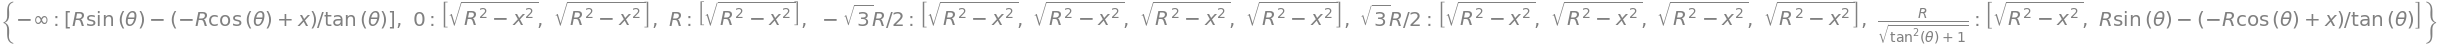

In [355]:
formulation.lookup

In [362]:
params = [(R, 4), (theta, pi/3)]


In [363]:
traj_piecewise

⎧         _________                                
⎪        ╱  2    2                        R        
⎪      ╲╱  R  - x          for x > ────────────────
⎪                                     _____________
⎪                                    ╱    2        
⎨                                  ╲╱  tan (θ) + 1 
⎪                                                  
⎪           -R⋅cos(θ) + x                          
⎪R⋅sin(θ) - ─────────────         otherwise        
⎪               tan(θ)                             
⎩                                                  

In [364]:
conditions = [piece[1] for piece in traj_piecewise.args]
conditions

⎡           R              ⎤
⎢x > ────────────────, True⎥
⎢       _____________      ⎥
⎢      ╱    2              ⎥
⎣    ╲╱  tan (θ) + 1       ⎦

In [371]:
piecewise_funcs = [piece[0] for piece in traj_piecewise.args]
piecewise_funcs

In [368]:
b

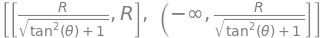

In [369]:
piecewise_intervals = [Interval(bound, R), Interval(-oo, bound)]
piecewise_intervals

In [370]:
piecewise_intervals_num = [pi.subs(params) for pi in piecewise_intervals]
piecewise_intervals_num

In [365]:
conditions_instantiated = [piece.subs(params) for piece in conditions]
conditions_instantiated

[x > 2, True]

In [383]:
formulation.orderings[1]

[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
 Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
 Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
 Transition(0, R),
 Boundary(R, 0)]

In [440]:
from safe_region_objects import *

In [442]:
params = [(R, 4), (theta, pi/2)]
piecewise_intervals_num = [pi.subs(params) for pi in piecewise_intervals]
longest_ordering_idx = -1
longest_ordering_len = -1
for i, ordering in enumerate(formulation.orderings):
    # Step through each ordering and figure out if it's valid - pick the one with the MOST valid points
    # Check if a transition point lies inside a valid piecewise condition
    if check_ordering_numeric(ordering, lookup, piecewise_funcs, piecewise_intervals_num, params, func_var):
        if len(ordering) > longest_ordering_len:
            longest_ordering_idx = i
            longest_ordering_len = len(ordering)
        
formulation.orderings[longest_ordering_idx]

[Boundary(-oo, R*sin(theta) + oo/tan(theta)),
 Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))),
 Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)),
 Transition(0, R),
 Transition(sqrt(3)*R/2, R/2),
 Boundary(R, 0)]